## Import & Install

In [ ]:
!pip install jupyter-summarytools # Colab
!pip install skimpy
!pip install imbalanced-learn scikit-learn

%pip install --pre pycaret[full] -qq

  Using cached numpy-2.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Using cached numpy-2.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.1 which is incompatible.
cudf-cu12 24.10.1 requires pandas<

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap

from summarytools import dfSummary
from skimpy import skim
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from pycaret.classification import *
from pycaret.classification import plot_model
from sklearn.ensemble import RandomForestClassifier

# 一、資料前處理

https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health/code

## 資料清洗

### 讀取資料與查看變數

In [ ]:
# /content/drive/MyDrive/Python與機器學習/期中報告/Impact_of_Remote_Work_on_Mental_Health.csv
df = pd.read_csv('drive/MyDrive/Python與機器學習/期中報告/Impact_of_Remote_Work_on_Mental_Health.csv')
df

Employee_ID  Age      Gender           Job_Role    Industry  \
0        EMP0001   32  Non-binary                 HR  Healthcare   
1        EMP0002   40      Female     Data Scientist          IT   
2        EMP0003   59  Non-binary  Software Engineer   Education   
3        EMP0004   27        Male  Software Engineer     Finance   
4        EMP0005   49        Male              Sales  Consulting   
...          ...  ...         ...                ...         ...   
4995     EMP4996   32        Male              Sales  Consulting   
4996     EMP4997   39      Female              Sales  Healthcare   
4997     EMP4998   42      Female              Sales  Healthcare   
4998     EMP4999   27      Female              Sales  Healthcare   
4999     EMP5000   29        Male                 HR          IT   

      Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                      13        Hybrid                     47   
1                       3        Remote                     52   
2                      22        Hybrid                     46   
3                      20        Onsite                     32   
4                      32        Onsite                     35   
...                   ...           ...                    ...   
4995                    4        Onsite                     24   
4996                   27        Onsite                     48   
4997                   21        Hybrid                     34   
4998                   26        Remote                     58   
4999                   30        Onsite                     20   

      Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                              7                         2       Medium   
1                              4                         1       Medium   
2                             11                         5       Medium   
3                              8                         4         High   
4                             12                         2         High   
...                          ...                       ...          ...   
4995                           2                         5         High   
4996                          15                         1          Low   
4997                           1                         4         High   
4998                           0                         5          Low   
4999                          15                         1          Low   

     Mental_Health_Condition Access_to_Mental_Health_Resources  \
0                 Depression                                No   
1                    Anxiety                                No   
2                    Anxiety                                No   
3                 Depression                               Yes   
4                        NaN                               Yes   
...                      ...                               ...   
4995                 Burnout                               Yes   
4996              Depression                               Yes   
4997                 Burnout                                No   
4998                     NaN                               Yes   
4999              Depression                               Yes   

     Productivity_Change  Social_Isolation_Rating  \
0               Decrease                        1   
1               Increase                        3   
2              No Change                        4   
3               Increase                        3   
4               Decrease                        3   
...                  ...                      ...   
4995            Decrease                        4   
4996            Decrease                        1   
4997            Increase                        3   
4998            Increase                        3   
4999           No Change                        3   

     Satisfaction_with_Remote_Work  Company_Support_for_Remote_W

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [ ]:
# df.describe()
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5000   │ │ string      │ 13    │                                                          │
│ │ Number of columns │ 20     │ │ int64       │ 7     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column                     ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25  ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Age                        │   0 │      0 │   40.99 │    11.3 │  22 │   31 │   41 │   51 │    60 │ █▆▆█▇▇  │  │
│ │ Years_of_Experience        │   0 │      0 │   17.81 │   10.02 │   1 │    9 │   18 │   26 │    35 │ ██▆██▇  │  │
│ │ Hours_Worked_Per_Week      │   0 │      0 │   39.61 │   11.86 │  20 │   29 │   40 │   50 │    60 │ ██▆█▇▇  │  │
│ │ Number_of_Virtual_Meetings │   0 │      0 │   7.559 │   4.636 │   0 │    4 │    8 │   12 │    15 │ █▅█▅██  │  │
│ │ Work_Life_Balance_Rating   │   0 │      0 │   2.984 │   1.411 │   1 │    2 │    3 │    4 │     5 │ █▇ █▇▇  │  │
│ │ Social_Isolation_Rating    │   0 │      0 │   2.994 │   1.395 │   1 │    2 │    3 │    4 │     5 │ ▇█ ▇█▇  │  │
│ │ Company_Support_for_Remote │   0 │      0 │   3.008 │   1.399 │   1 │    2 │    3 │    4 │     5 │ ▇▇ █▇▇  │  │
│ │ _Work                      │     │        │         │         │     │      │      │      │       │         │  │
│ └────────────────────────────┴─────┴────────┴─────────┴─────────┴─────┴──────┴──────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃           ┃      ┃       ┃          ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total    ┃  │
│ ┃ column    ┃ NA   ┃ NA %  ┃ shortest ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Employee_ │    0 │     0 │ EMP0001  │ EMP0001   │ EMP0001   │ EMP5000   │         7 │         1 │     5000 │  │
│ │ ID        │      │       │          │           │           │           │           │           │          │  │
│ │ Gender    │    0 │     0 │ Male     │ Prefer    │ Female    │ Prefer    │       9.2 │       1.7 │     8726 │  │
│ │           │      │       │          │ not to    │           │ not to    │           │           │          │  │
│ │           │      │       │          │ say       │           │ say       │           │           │          │  │
│ │ Job_Role  │    0 │     0 │ HR       │ Software  │ Data      │ Software  │      9.99 │       1.4 │     7145 │  │
│ │           │      │       │          │ Engineer  │ Scientist │ Engineer  │           │           │          │  │
│ │ Industry  │    0 │     0 │ IT       │ Manufactu │ Consultin │ Retail    │      8.05 │         1 │     5000 │  │
│ │           │      │       │          │ ring      │ g 

In [ ]:
dfSummary(df)

變數介紹:
*   Employee_ID:**員工的唯一識別碼**
*   Age:**年齡**
*   Gender:**性別**
*   Job_Role:**目前的工作崗位**
*   Industry:**產業**
*   Years_of_Experience:**工作經驗(年)**
*   Work_Location:**工作型態(遠端工作、混合工作或現場工作)**
*   Hours_Worked_Per_Week:**每週工時**
*   Number_of_Virtual_Meetings:**視訊會議次數**
*   Work_Life_Balance_Rating:**工作與生活平衡評級**
*   Stress_Level:**壓力指數(壓力程度)**
*   Mental_Health_Condition:**心理健康狀況(焦慮、憂鬱、倦怠、無感覺)**
*   Access_to_Mental_Health_Resources:**是否獲取心理健康資源**
*   Productivity_Change:**生產力是否改變(是或否或不變)**
*   Social_Isolation_Rating:**社會孤立評分(感到孤立程度)**
*   Satisfaction_with_Remote_Work:**對遠端工作的滿意度(滿意、中性、不滿意)**
*   Company_Support_for_Remote_Work:**公司對遠距工作的支持(1~5)**
*   Physical_Activity:**身體運動(每日 每周 無)**
*   Sleep_Quality:**睡眠品質(平均 好 差)**
*   Region:**地區**




### 缺失值

In [ ]:
#　查看總體缺失值
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# 總缺失值的比例
percent_missing = (total_missing/total_cells) * 100
print(percent_missing,"%")

2.825 %


In [ ]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


In [ ]:
# 各欄位缺失值
#計算缺失資料占多少比例
miss_ratio = missing_values_count / len(df)
miss_ratio = (miss_ratio * 100).sort_values(ascending=False)
print(miss_ratio)

Physical_Activity                    32.58
Mental_Health_Condition              23.92
Employee_ID                           0.00
Age                                   0.00
Sleep_Quality                         0.00
Company_Support_for_Remote_Work       0.00
Satisfaction_with_Remote_Work         0.00
Social_Isolation_Rating               0.00
Productivity_Change                   0.00
Access_to_Mental_Health_Resources     0.00
Stress_Level                          0.00
Work_Life_Balance_Rating              0.00
Number_of_Virtual_Meetings            0.00
Hours_Worked_Per_Week                 0.00
Work_Location                         0.00
Years_of_Experience                   0.00
Industry                              0.00
Job_Role                              0.00
Gender                                0.00
Region                                0.00
dtype: float64


有缺失的變數:
1.   Physical_Activity : 32.58%
2.   Mental_Health_Condition : 23.92%

針對有缺失值的變數處理方式:
1.   Physical_Activity:因為他的值是[每日,每周,nan], 所以我想說把nan值全部填入0, 當成該員工沒有運動習慣
2.   Mental_Health_Condition:因為他的值是[焦慮,倦怠,憂鬱,nan], 所以我想把nan填入None, 這個的變數的nan是沒有其他三個的心理狀態



In [ ]:
# Physical_Activity
# 將 Physical_Activity 的缺失值填補為 None
df['Physical_Activity'].fillna('None', inplace=True)

# 將 Mental_Health_Condition 缺失值填補為 None
df['Mental_Health_Condition'].fillna('None', inplace=True)

# 檢查結果
print(df.isnull().sum())

Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64


In [ ]:
df['Physical_Activity']

0       Weekly
1       Weekly
2         None
3         None
4       Weekly
         ...  
4995    Weekly
4996      None
4997     Daily
4998     Daily
4999      None
Name: Physical_Activity, Length: 5000, dtype: object

In [ ]:
df['Mental_Health_Condition']

0       Depression
1          Anxiety
2          Anxiety
3       Depression
4             None
           ...    
4995       Burnout
4996    Depression
4997       Burnout
4998          None
4999    Depression
Name: Mental_Health_Condition, Length: 5000, dtype: object

# 二、變數探索

In [ ]:
# 資料集的全部變數
all_columns = df.columns.tolist()
print("全部變數:",all_columns)

全部變數: ['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry', 'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating', 'Stress_Level', 'Mental_Health_Condition', 'Access_to_Mental_Health_Resources', 'Productivity_Change', 'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work', 'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality', 'Region']


In [ ]:
# 數值變數
num_features = df.select_dtypes(include=np.number).columns.tolist()
print("數值變數：", num_features)

數值變數： ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating', 'Company_Support_for_Remote_Work']


In [ ]:
# 類別變數
cat_features = df.select_dtypes(exclude=np.number).columns.tolist()
print("類別變數：", cat_features)

類別變數： ['Employee_ID', 'Gender', 'Job_Role', 'Industry', 'Work_Location', 'Stress_Level', 'Mental_Health_Condition', 'Access_to_Mental_Health_Resources', 'Productivity_Change', 'Satisfaction_with_Remote_Work', 'Physical_Activity', 'Sleep_Quality', 'Region']


### 目標變數：心理健康狀況（分成兩類）

In [ ]:
# 將Mental_Health_Condition分成兩類,(焦慮倦怠憂鬱) 分到has_Mental_Health_Condition
# None 分到has_None
df['Mental_Health_Category'] = df['Mental_Health_Condition'].apply(lambda x: 'has_Mental_Health_Condition' if x != 'None' else 'has_None')
df['Mental_Health_Category']

0       has_Mental_Health_Condition
1       has_Mental_Health_Condition
2       has_Mental_Health_Condition
3       has_Mental_Health_Condition
4                          has_None
                   ...             
4995    has_Mental_Health_Condition
4996    has_Mental_Health_Condition
4997    has_Mental_Health_Condition
4998                       has_None
4999    has_Mental_Health_Condition
Name: Mental_Health_Category, Length: 5000, dtype: object

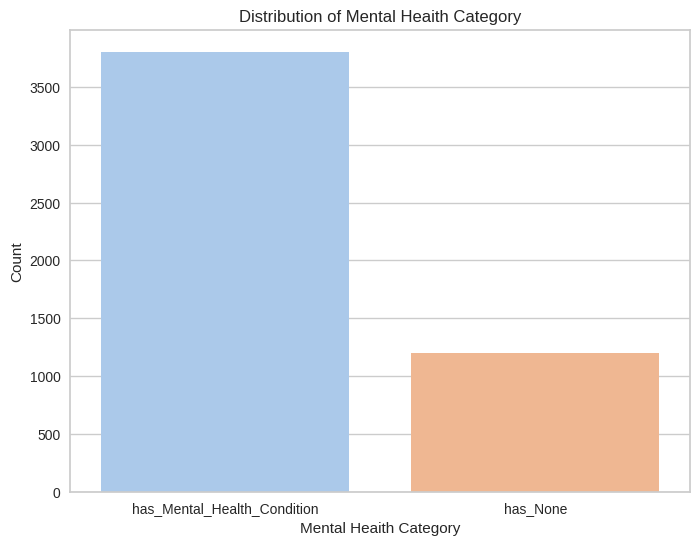

In [ ]:
plt.figure(figsize=(8, 6))  # 設定圖表大小
sns.countplot(x='Mental_Health_Category', data=df, palette="pastel")  # 繪製直方圖，使用 "pastel" 調色板
plt.title('Distribution of Mental Heaith Category')  # 設定圖表標題
plt.xlabel('Mental Heaith Category')  # 設定 x 軸標籤
plt.ylabel('Count')  # 設定 y 軸標籤
plt.show()  # 顯示圖表

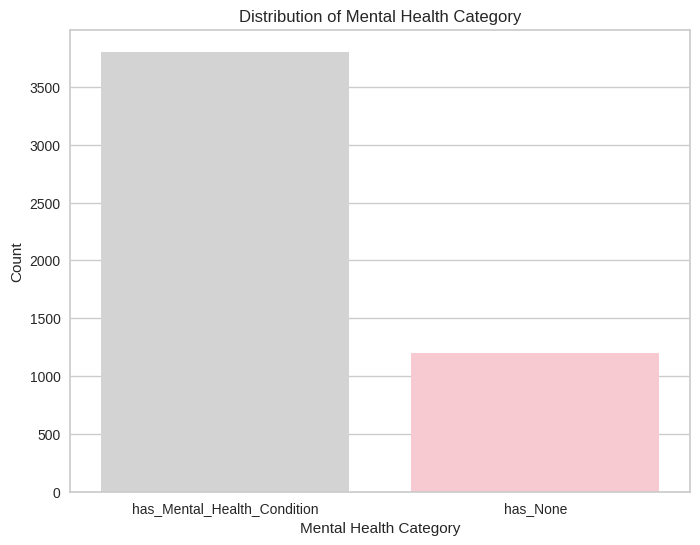

In [ ]:
plt.figure(figsize=(8, 6))  # 設定圖表大小
sns.countplot(
    x='Mental_Health_Category',
    data=df,
    palette=['#D3D3D3', '#FFC1CC']  # 灰色和粉色的組合
)  # 繪製直方圖
plt.title('Distribution of Mental Health Category')  # 設定圖表標題
plt.xlabel('Mental Health Category')  # 設定 x 軸標籤
plt.ylabel('Count')  # 設定 y 軸標籤
plt.show()  # 顯示圖表



##### 心理健康狀況 vs 職位

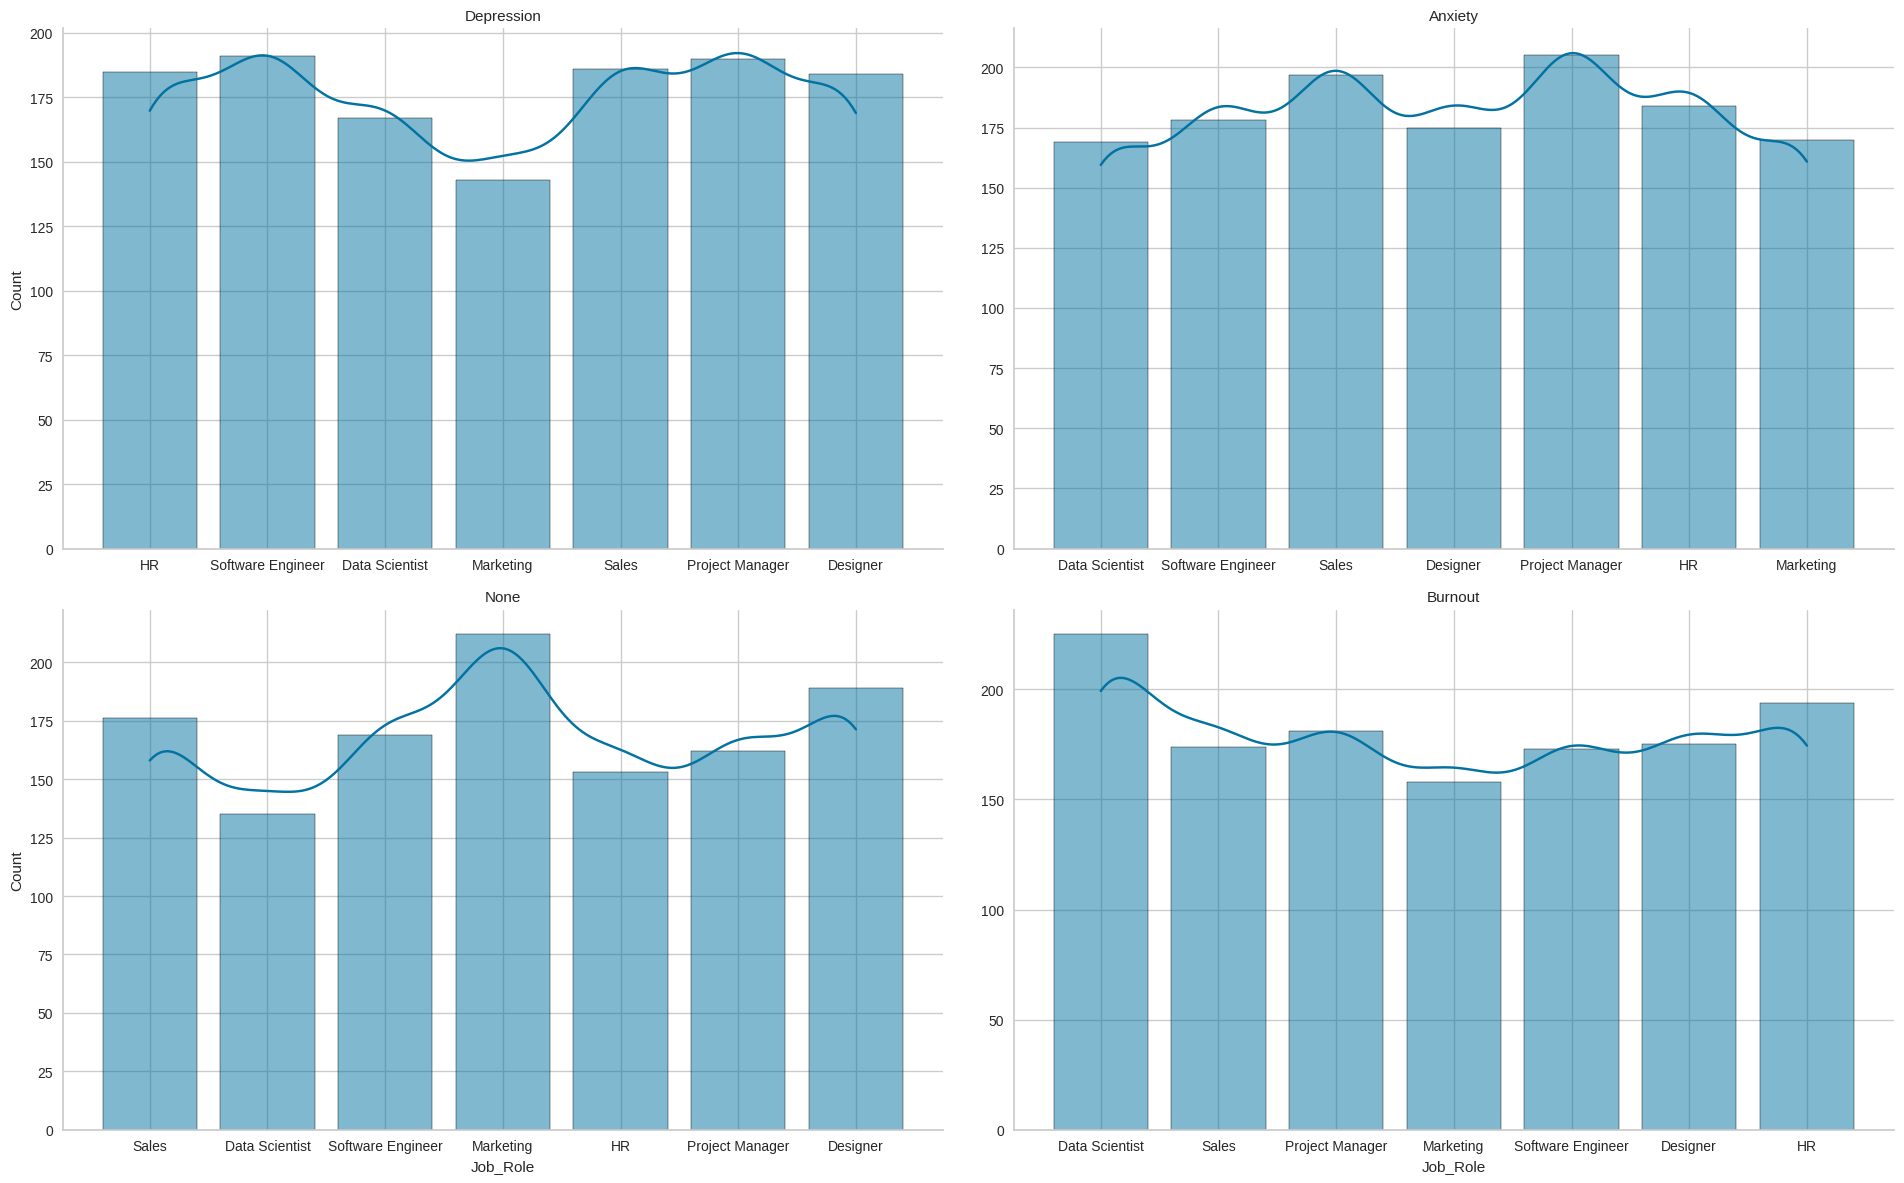

In [ ]:
# 心理健康狀況 vs 工作崗位
g = sns.FacetGrid(df, col='Mental_Health_Condition', col_wrap=2, sharex=False, sharey=False,  height=6, aspect=1.6)
g.map(sns.histplot, 'Job_Role', kde=True ,discrete=True, shrink=0.8)
g.set_titles("{col_name}")  # 設定子圖標題
g.set_axis_labels('Job_Role', 'Count')  # 設定軸標籤
plt.show()



1.   在憂鬱的圖中, 軟體工程師跟PM是最多人的, 行銷是最少的
2.   在焦慮的圖中, PM跟業務是最多人的
3.   在倦怠的圖中, 資料科學家是最多人的, 行銷是最少的
4.   在None的圖中, 行銷的人數是最多的, 資料科學家是最少的


#### 心理健康狀況 vs 壓力


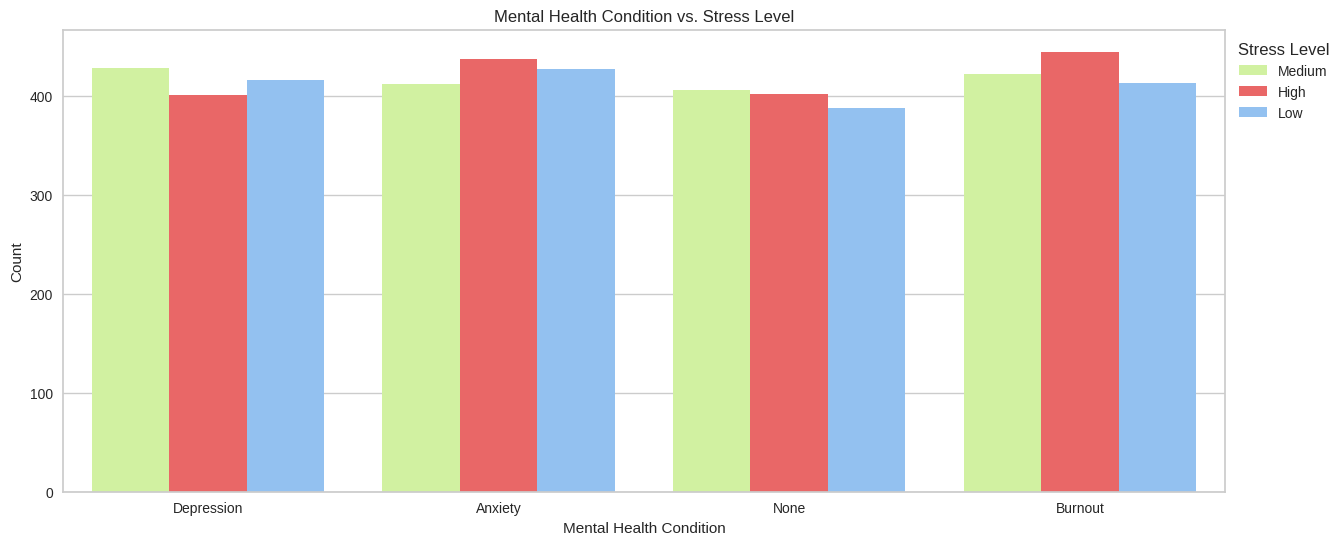

In [ ]:
# 壓力 vs 心理健康狀況 :長條圖
colors = {'Low': '#84C1FF', 'Medium': '#D3FF93', 'High': '#FF5151'}
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Mental_Health_Condition', hue='Stress_Level',palette=colors)
plt.title('Mental Health Condition vs. Stress Level')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count')
plt.legend(title='Stress Level', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

*    在**高壓狀態**下會感到**倦怠**, 再來就是焦慮。如果看沒有其他三個心理狀態的話, 最多人的壓力指數是適中的

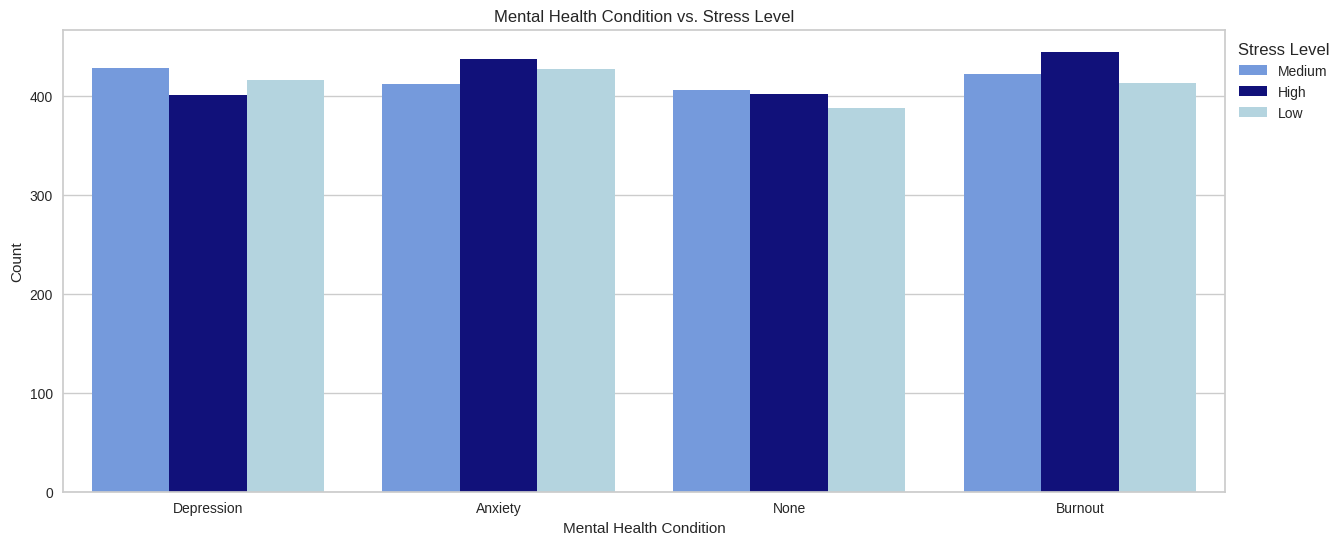

In [ ]:
colors = {'Low': '#ADD8E6', 'Medium': '#6495ED', 'High': '#00008B'}  # 淺藍、中藍、深藍
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Mental_Health_Condition', hue='Stress_Level', palette=colors)
plt.title('Mental Health Condition vs. Stress Level')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count')
plt.legend(title='Stress Level', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()


### 數值變數

#### 年齡

In [ ]:
df['Age'].describe()

count    5000.000000
mean       40.995000
std        11.296021
min        22.000000
25%        31.000000
50%        41.000000
75%        51.000000
max        60.000000
Name: Age, dtype: float64

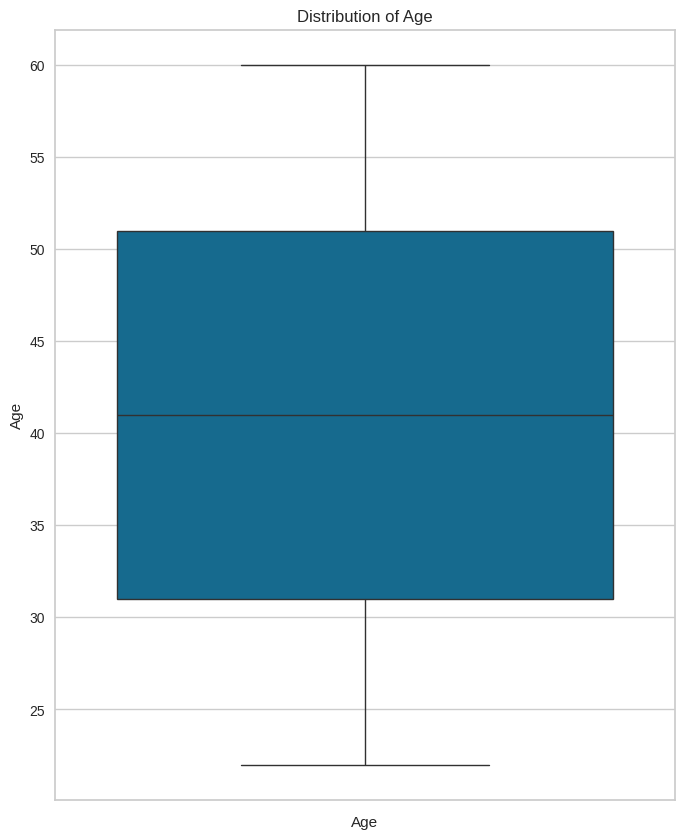

In [ ]:
# 盒鬚圖
plt.figure(figsize=(8,10))
sns.boxplot(y=df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

年齡沒有離群值

年齡範圍： 38


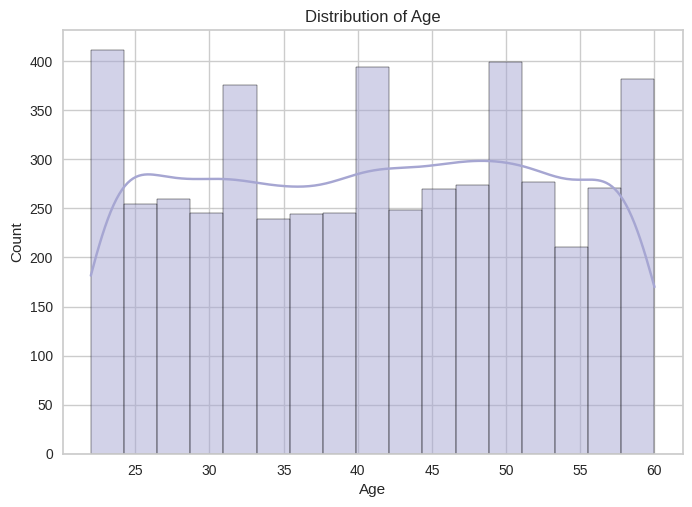

In [ ]:
# Age
bi = df['Age'].max() - df['Age'].min()
print("年齡範圍：",bi)
sns.histplot(df['Age'], bins="auto", kde=True, color='#A6A6D2')
# sns.kdeplot(df['Age'], color='orange')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

可以發現這份資料25歲以下的人數是最多的,第二多的是50歲,平均年齡是40歲(我猜是被50歲人數眾多拉高)

#### 每週工時

In [ ]:
# Hours_Worked_Per_Week
df['Hours_Worked_Per_Week'].describe()

count    5000.000000
mean       39.614600
std        11.860194
min        20.000000
25%        29.000000
50%        40.000000
75%        50.000000
max        60.000000
Name: Hours_Worked_Per_Week, dtype: float64

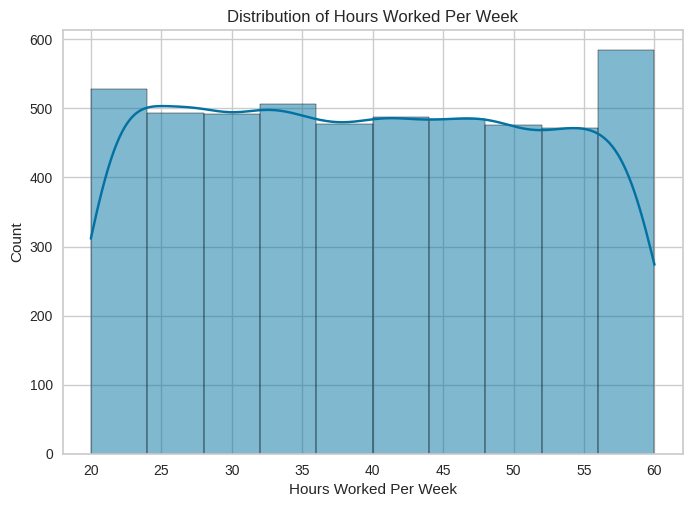

In [ ]:
# 直方圖
sns.histplot(df['Hours_Worked_Per_Week'], bins=10, kde=True)
plt.title('Distribution of Hours Worked Per Week')
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Count')
plt.show()

每週工時可以發現平均工時約是40小時,分布很平均

年齡範圍： 38


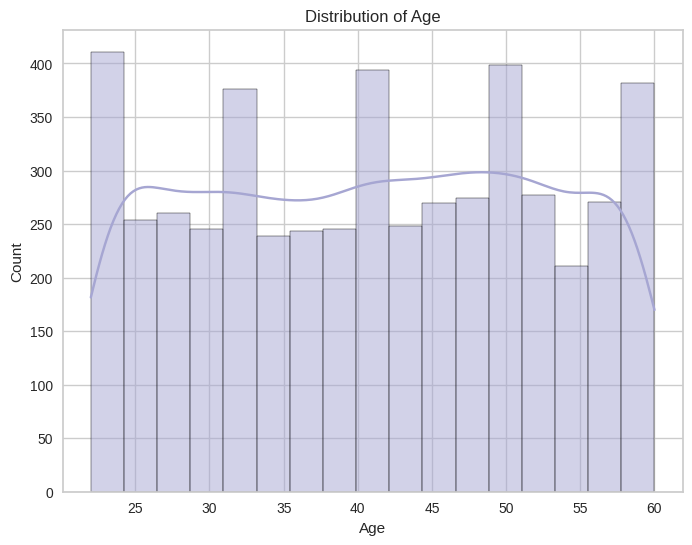

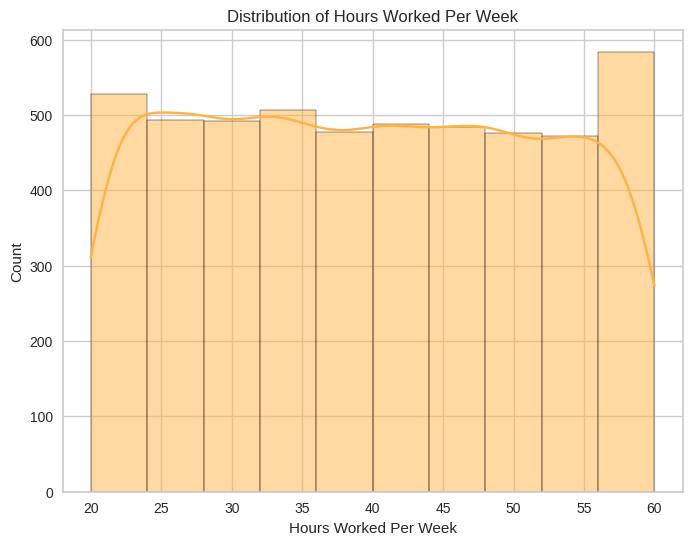

In [ ]:
# Age Distribution
bi = df['Age'].max() - df['Age'].min()
print("年齡範圍：", bi)

plt.figure(figsize=(8, 6))  # 設置相同的寬高比例
sns.histplot(df['Age'], bins="auto", kde=True, color='#A6A6D2')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Hours Worked Per Week Distribution
plt.figure(figsize=(8, 6))  # 設置相同的寬高比例
sns.histplot(df['Hours_Worked_Per_Week'], bins=10, kde=True, color='#FFB347')  # 添加顏色
plt.title('Distribution of Hours Worked Per Week')
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Count')
plt.show()


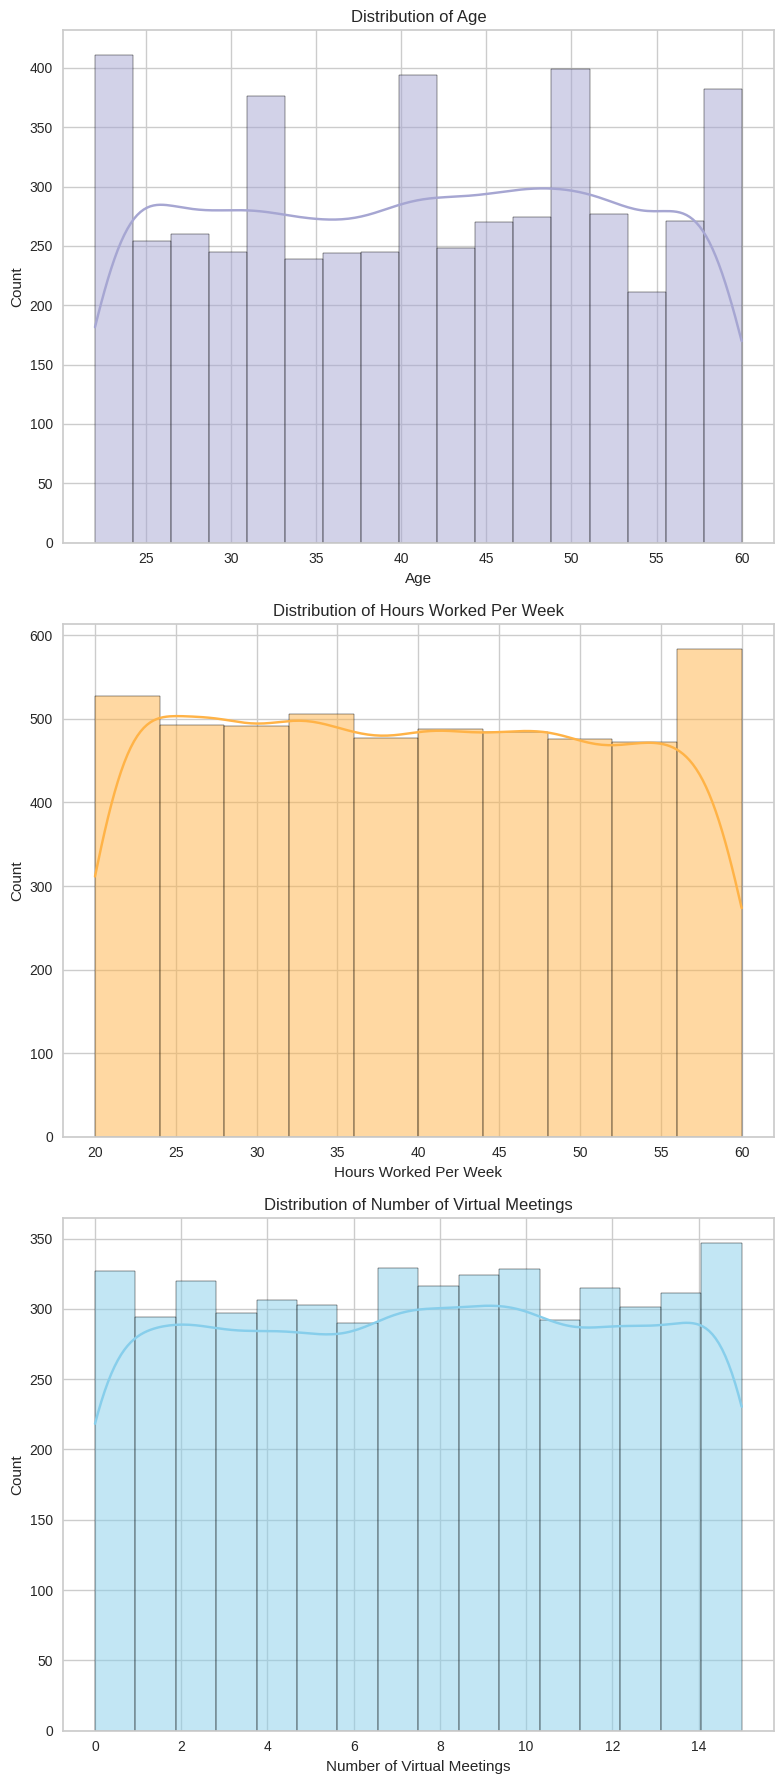

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 創建子圖
fig, axes = plt.subplots(3, 1, figsize=(8, 18))  # 3行1列，長寬一致

# Age Distribution
sns.histplot(df['Age'], bins="auto", kde=True, color='#A6A6D2', ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Hours Worked Per Week Distribution
sns.histplot(df['Hours_Worked_Per_Week'], bins=10, kde=True, color='#FFB347', ax=axes[1])
axes[1].set_title('Distribution of Hours Worked Per Week')
axes[1].set_xlabel('Hours Worked Per Week')
axes[1].set_ylabel('Count')

# Number of Virtual Meetings Distribution
sns.histplot(df['Number_of_Virtual_Meetings'], bins=16, kde=True, color='#87CEEB', ax=axes[2])
axes[2].set_title('Distribution of Number of Virtual Meetings')
axes[2].set_xlabel('Number of Virtual Meetings')
axes[2].set_ylabel('Count')

# 調整布局
plt.tight_layout()
plt.show()


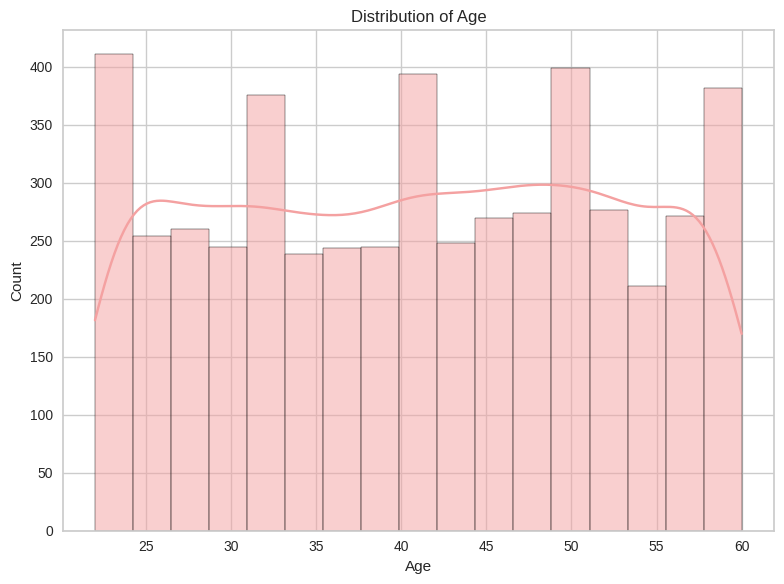

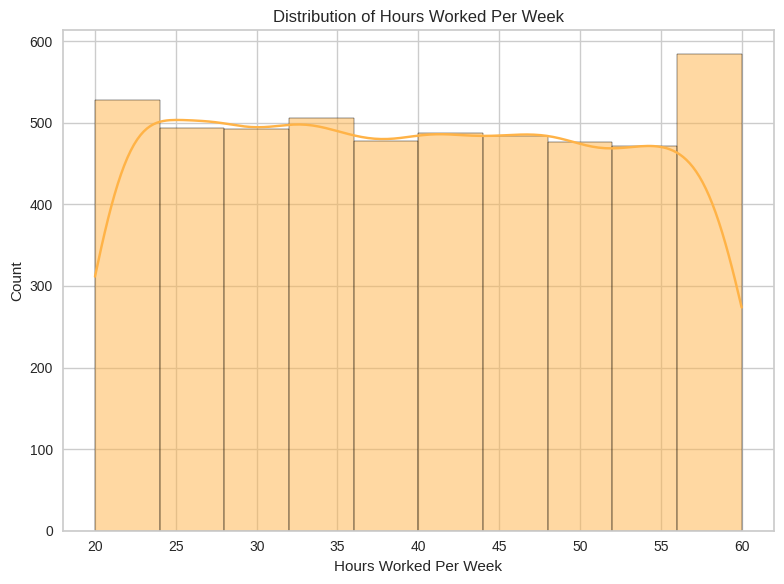

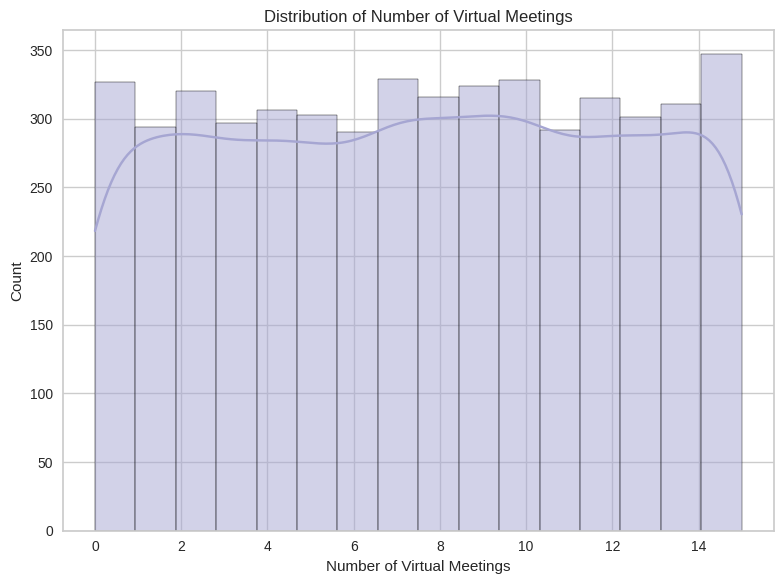

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age Distribution
plt.figure(figsize=(8, 6))  # 單獨設置圖表大小
sns.histplot(df['Age'], bins="auto", kde=True, color='#F4A1A1')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()  # 確保圖表不會重疊
plt.show()

# Hours Worked Per Week Distribution
plt.figure(figsize=(8, 6))  # 單獨設置圖表大小
sns.histplot(df['Hours_Worked_Per_Week'], bins=10, kde=True, color='#FFB347')
plt.title('Distribution of Hours Worked Per Week')
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Count')
plt.tight_layout()  # 確保圖表不會重疊
plt.show()

# Number of Virtual Meetings Distribution
plt.figure(figsize=(8, 6))  # 單獨設置圖表大小
sns.histplot(df['Number_of_Virtual_Meetings'], bins=16, kde=True, color='#A6A6D2')
plt.title('Distribution of Number of Virtual Meetings')
plt.xlabel('Number of Virtual Meetings')
plt.ylabel('Count')
plt.tight_layout()  # 確保圖表不會重疊
plt.show()


#### 視訊會議數

In [ ]:
# Number_of_Virtual_Meetings
df['Number_of_Virtual_Meetings'].describe()

count    5000.000000
mean        7.559000
std         4.636121
min         0.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        15.000000
Name: Number_of_Virtual_Meetings, dtype: float64

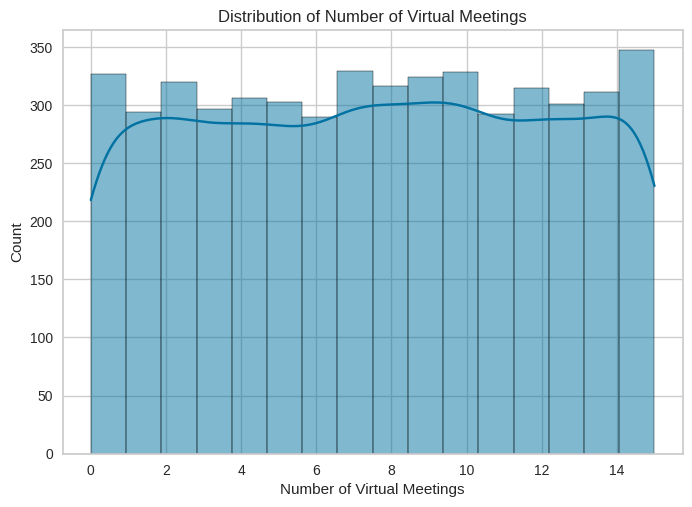

In [ ]:
sns.histplot(df['Number_of_Virtual_Meetings'], bins=16, kde=True)
plt.title('Distribution of Number of Virtual Meetings')
plt.xlabel('Number of Virtual Meetings')
plt.ylabel('Count')
plt.show()

視訊會議的分佈也很平緩, 平均是4.6次

#### 工作生活平衡

In [ ]:
# Work_Life_Balance_Rating:
# 數值越高代表在工作和生活之間取得了良好的平衡(都是整數)
df['Work_Life_Balance_Rating'].describe()

count    5000.000000
mean        2.984200
std         1.410513
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Work_Life_Balance_Rating, dtype: float64

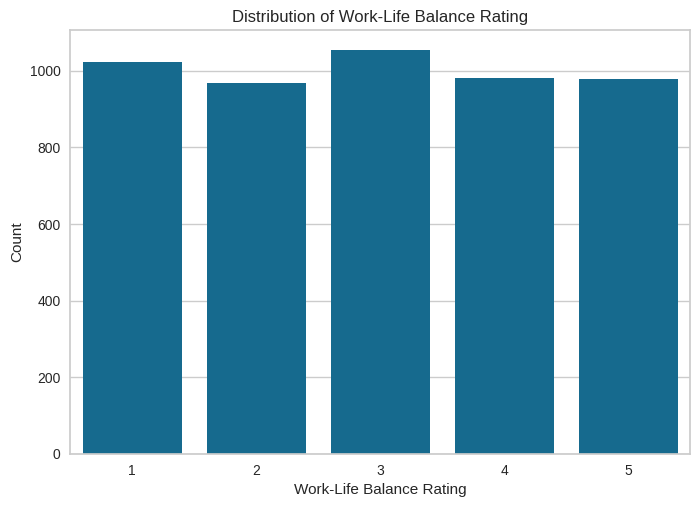

In [ ]:
sns.countplot(x='Work_Life_Balance_Rating', data=df)
plt.title('Distribution of Work-Life Balance Rating')
plt.xlabel('Work-Life Balance Rating')
plt.ylabel('Count')
plt.show()

Work_Life_Balance_Rating 代表的是 工作與生活平衡評級, 而從圖可以看出3是最高的, 代表大家對於這個平衡的感覺是處於中間, 而第二多的是1, 所以這分資料的員工沒辦法在工作與生活中取得較好的平衡

#### 社會孤立指數

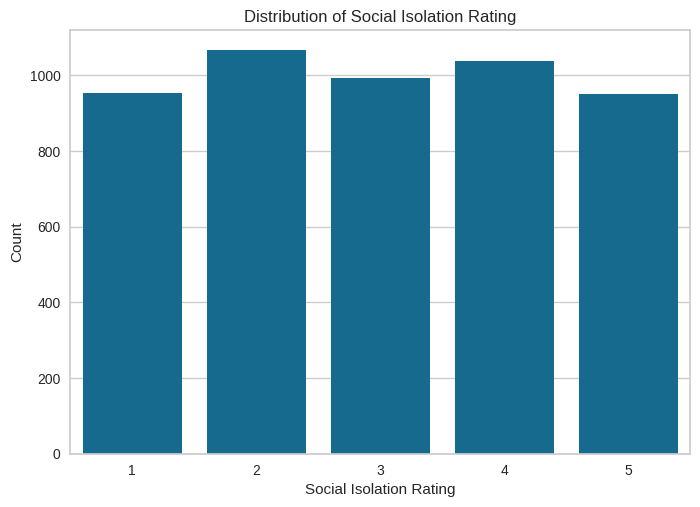

In [ ]:
# Social_Isolation_Rating:
#　社會孤立的程度，數值越高代表員工感到更孤立
sns.countplot(x='Social_Isolation_Rating', data=df)
plt.title('Distribution of Social Isolation Rating')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Count')
plt.show()

社會孤立指數出現最多次的是2, 第二多是4



#### 公司對遠端工作的支持度

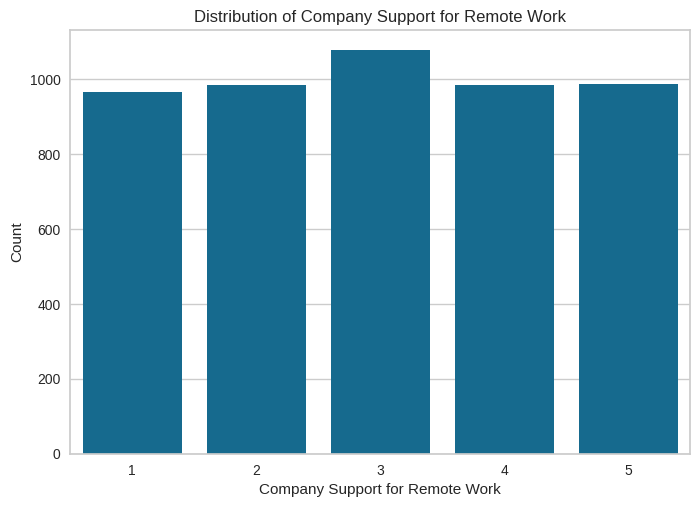

In [ ]:
# 'Company_Support_for_Remote_Work'
# 數值越高代表公司越支持遠端工作
sns.countplot(x='Company_Support_for_Remote_Work', data=df)
plt.title('Distribution of Company Support for Remote Work')
plt.xlabel('Company Support for Remote Work')
plt.ylabel('Count')
plt.show()

In [ ]:
print(df["Company_Support_for_Remote_Work"].value_counts())

Company_Support_for_Remote_Work
3    1077
5     987
2     985
4     984
1     967
Name: count, dtype: int64


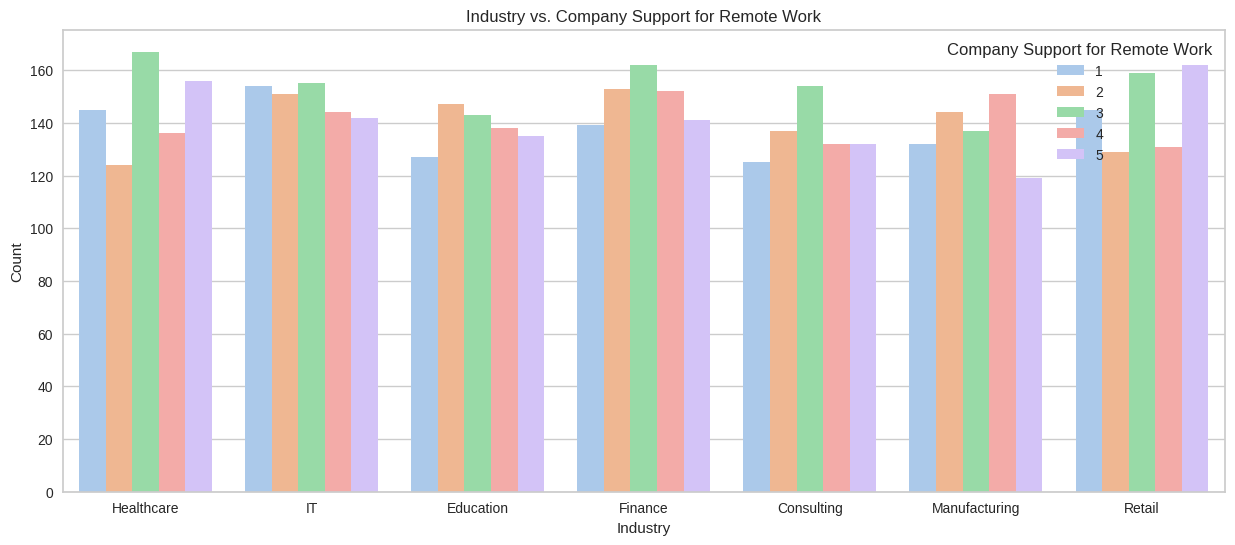

In [ ]:
# 支持遠端工作 vs 產業
# colors = {'Low': '#84C1FF', 'Medium': '#D3FF93', 'High': '#FF5151'}
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Industry', hue='Company_Support_for_Remote_Work',palette='pastel')
plt.title('Industry vs. Company Support for Remote Work')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.legend(title='Company Support for Remote Work')
plt.show()

*   1：公司幾乎不支持遠端工作。
*   2：公司對遠端工作的支持有限。
*   3：公司對遠端工作的支持程度中等。
*   4：公司對遠端工作的支持程度较高。
*   5：公司非常支持遠端工作。


可以發現(3:公司對遠端工作的支持程度中等)是次數最多的, 再來是(5：公司非常支持遠端工作), 可以看出公司對遠端工作大多都是支持的

### 類別變數

刪除(Employee_ID)這個變數

#### 性別

In [ ]:
# # 交叉表：建立性別與心理健康狀況的交叉表
# gender_mental_health = pd.crosstab(df['Gender'], df['Mental_Health_Condition'])
# print(gender_mental_health)

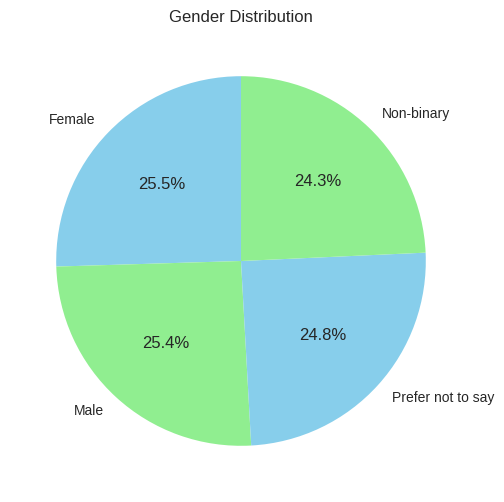

In [ ]:
# 性別圓餅圖
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.show()


這份資料的性別變數有四種
1.   女生
2.   男生
3.   非二元性別
4.   不願透漏

這份資料調查的員工中, 這四個的比例都差不多, 而女生是最多的, 第二多的是男生



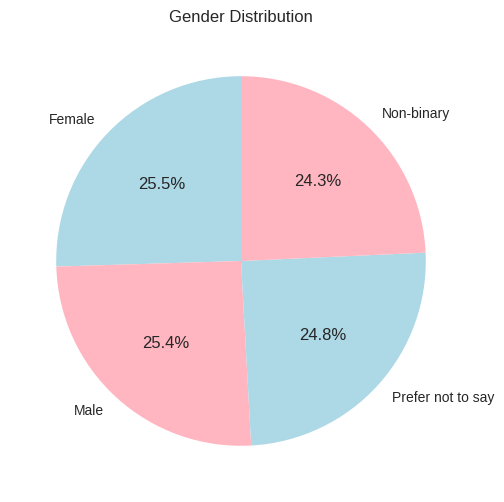

In [ ]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ADD8E6', '#FFB6C1']
)
plt.title('Gender Distribution')
plt.show()



#### 工作崗位

##### 工作職位 vs 工作型態

In [ ]:
df['Work_Location'].value_counts()

Work_Location
Remote    1714
Hybrid    1649
Onsite    1637
Name: count, dtype: int64

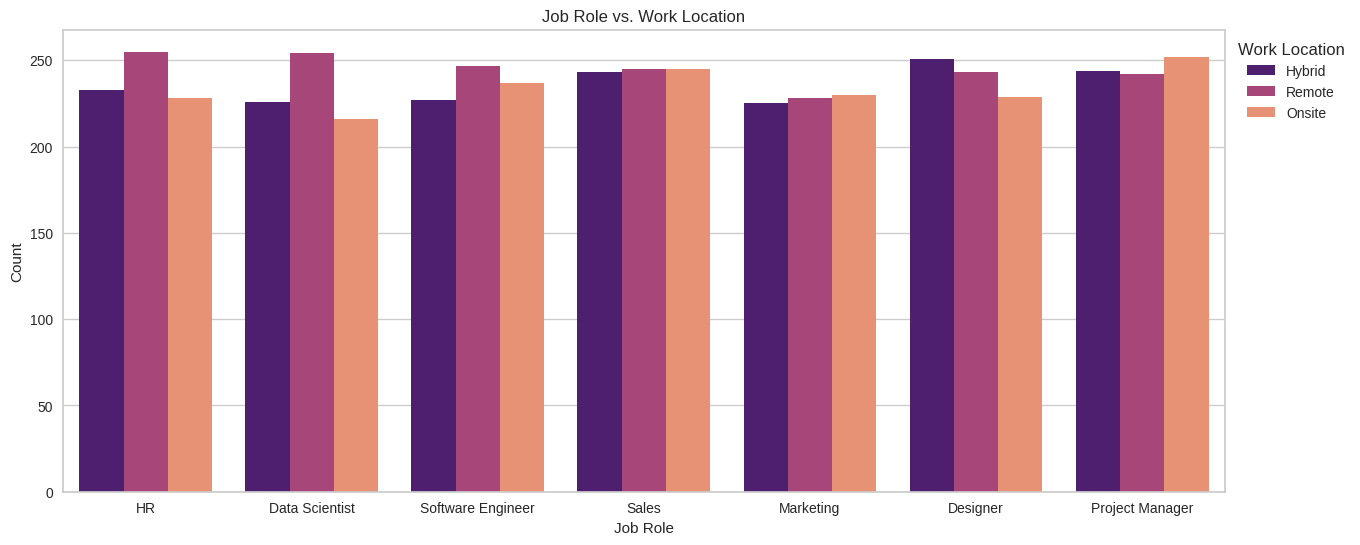

In [ ]:
# 工作職位 vs 工作型態
# colors = {'Low': '#84C1FF', 'Medium': '#D3FF93', 'High': '#FF5151'}
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Job_Role', hue='Work_Location',palette='magma')
plt.title('Job Role vs. Work Location')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.legend(title='Work Location', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

In [ ]:
Role_Work_Location = pd.crosstab(df['Job_Role'], df['Work_Location'])
print(Role_Work_Location)

Work_Location      Hybrid  Onsite  Remote
Job_Role                                 
Data Scientist        226     216     254
Designer              251     229     243
HR                    233     228     255
Marketing             225     230     228
Project Manager       244     252     242
Sales                 243     245     245
Software Engineer     227     237     247



1.   工作崗位中的職位最多的是***專案經理***, 再來是***銷售***
2.   而所有工作崗位中, 遠距人數最多的是***HR***跟***資料科學家***



#### 產業

##### 產業 vs 工作型態

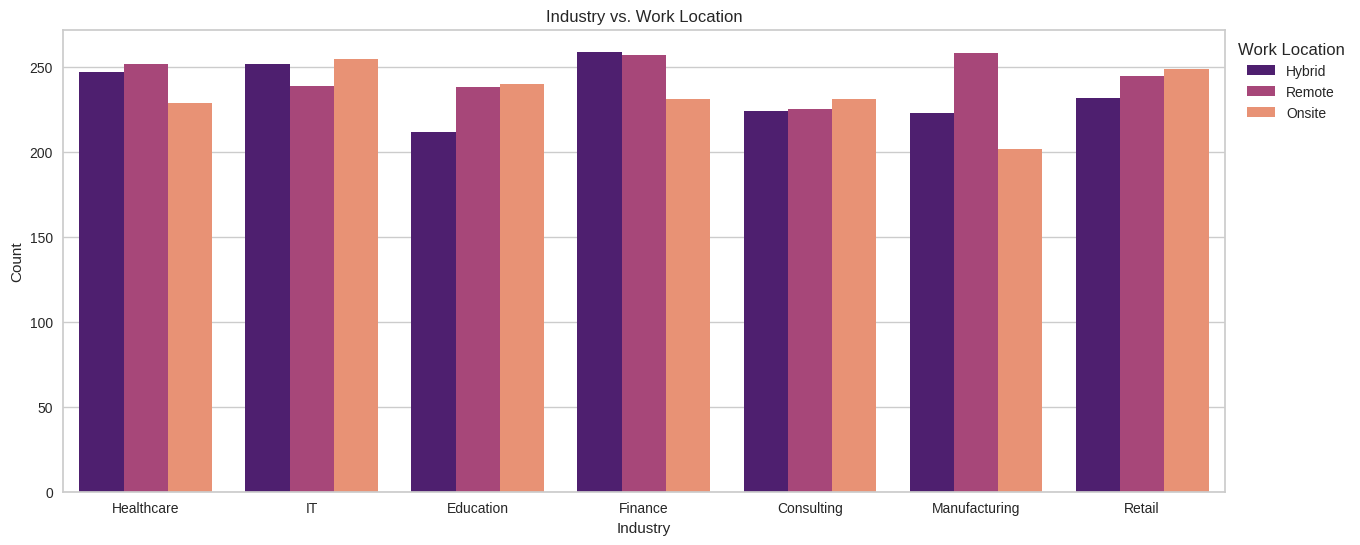

In [ ]:
# 產業 vs 工作型態
# colors = {'Low': '#84C1FF', 'Medium': '#D3FF93', 'High': '#FF5151'}
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Industry', hue='Work_Location',palette='magma')
plt.title('Industry vs. Work Location')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.legend(title='Work Location', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

In [ ]:
Industry_Work_Location = pd.crosstab(df['Industry'], df['Work_Location'])
print(Industry_Work_Location)

Work_Location  Hybrid  Onsite  Remote
Industry                             
Consulting        224     231     225
Education         212     240     238
Finance           259     231     257
Healthcare        247     229     252
IT                252     255     239
Manufacturing     223     202     258
Retail            232     249     245




1.   這份資料最多人從事的產業是***金融業***跟***IT產業***
2.   遠距人數最多的是***製造業***跟***金融業***



#### 工作型態

Text(0.5, 1.0, 'Work Location Distribution')

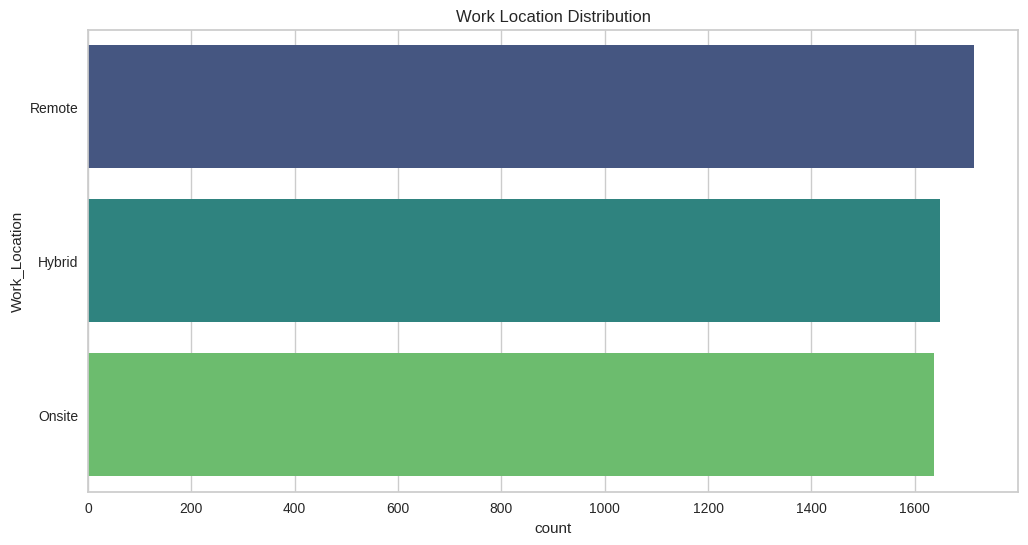

In [ ]:
# Work_Location
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Work_Location', order=df['Work_Location'].value_counts().index, palette='viridis')
plt.title('Work Location Distribution')

在這份資料中, 遠距是最多人的

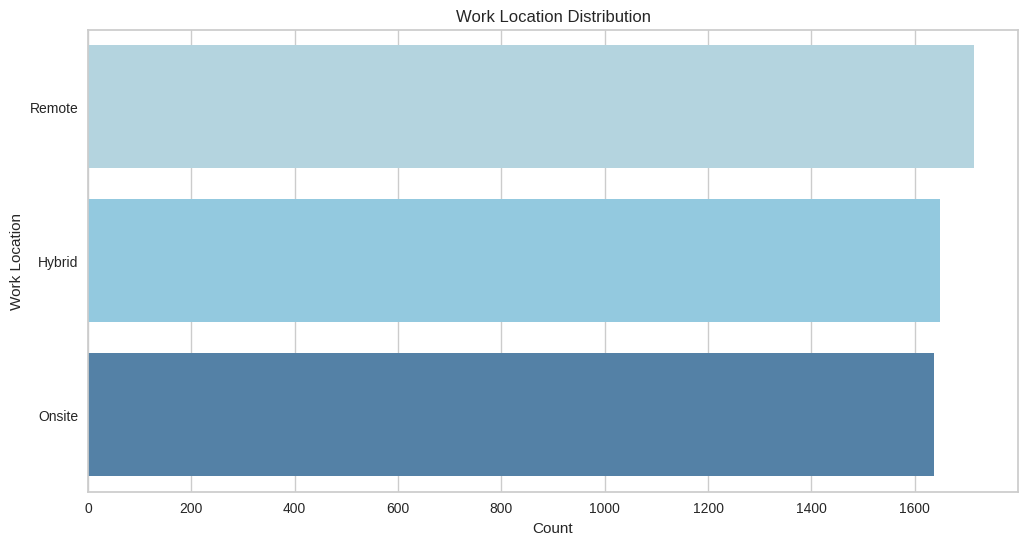

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    y='Work_Location',
    order=df['Work_Location'].value_counts().index,
    palette=['#ADD8E6', '#87CEEB', '#4682B4']  # 淺藍、天藍、深藍
)
plt.title('Work Location Distribution')
plt.xlabel('Count')  # 添加x軸標籤
plt.ylabel('Work Location')  # 添加y軸標籤
plt.show()

#### 壓力指數

In [ ]:
set(df['Stress_Level'])

{'High', 'Low', 'Medium'}

In [ ]:
# Stress_Level:{'High', 'Low', 'Medium'}
# 先將Stress_Level轉換成-1,0,1分別代表 'Low','Medium','High'
## 之後模型可以代進去
stress_mapping = {'Low': -1, 'Medium': 0, 'High': 1}
df['Stress_Level_Numeric'] = df['Stress_Level'].map(stress_mapping)
df['Stress_Level_Numeric']

0       0
1       0
2       0
3       1
4       1
       ..
4995    1
4996   -1
4997    1
4998   -1
4999   -1
Name: Stress_Level_Numeric, Length: 5000, dtype: int64

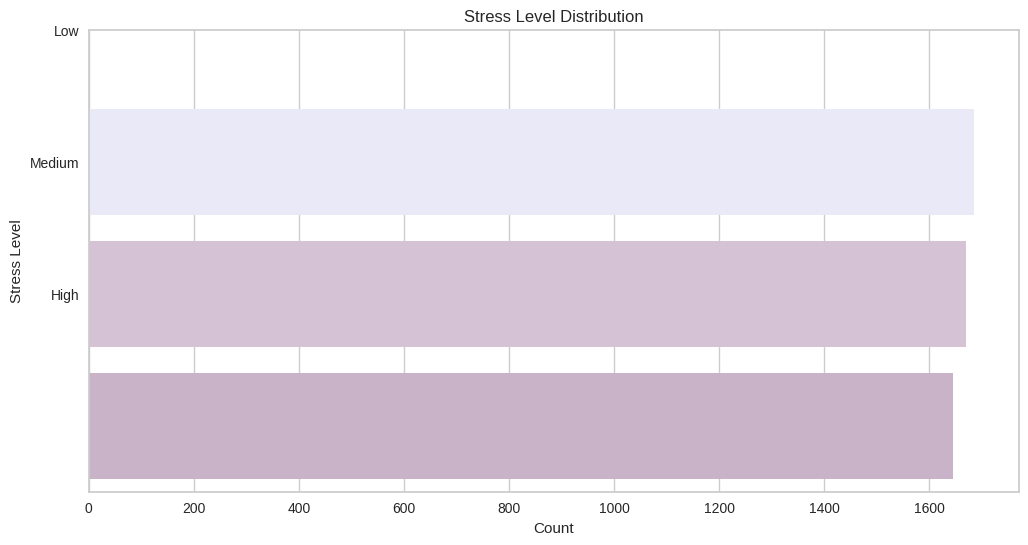

In [ ]:
# 建立數值到名稱的映射
stress_labels = {-1: 'Low', 0: 'Medium', 1: 'High'}

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    y='Stress_Level_Numeric',
    order=df['Stress_Level_Numeric'].value_counts().index,
    palette=['#E6E6FA', '#D8BFD8', '#CDAFCD']  # 非常淺紫、淡紫丁香、柔和紫
)
plt.title('Stress Level Distribution')
plt.xlabel('Count')
plt.ylabel('Stress Level')

# 替換 y 軸刻度標籤為原始名稱
plt.yticks(ticks=[-1, 0, 1], labels=[stress_labels[-1], stress_labels[0], stress_labels[1]])

plt.show()


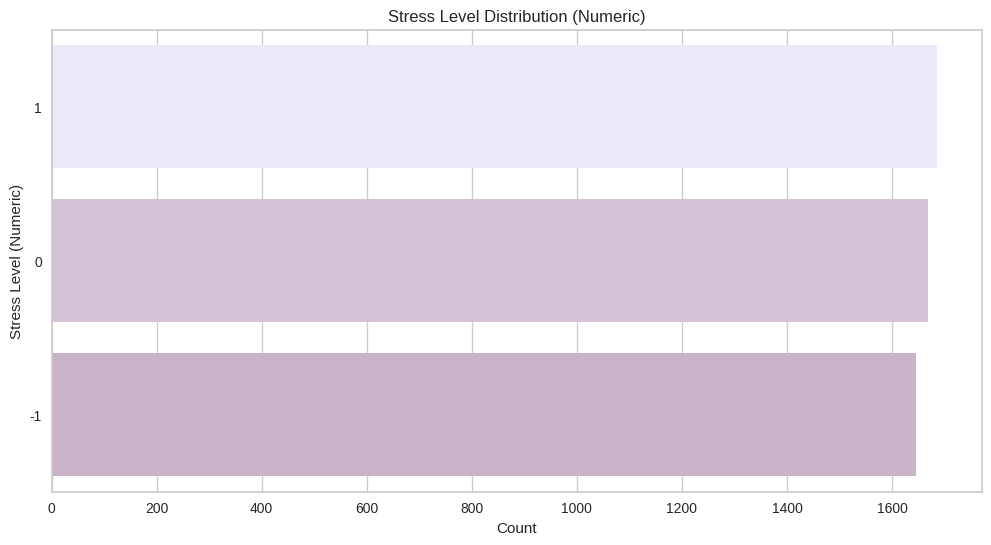

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    y='Stress_Level_Numeric',
    order=df['Stress_Level_Numeric'].value_counts().index,
    palette=['#E6E6FA', '#D8BFD8', '#CDAFCD']
)
plt.title('Stress Level Distribution (Numeric)')
plt.xlabel('Count')
plt.ylabel('Stress Level (Numeric)')
plt.show()

##### 壓力 vs 工作崗位

##### 壓力 vs 生產力

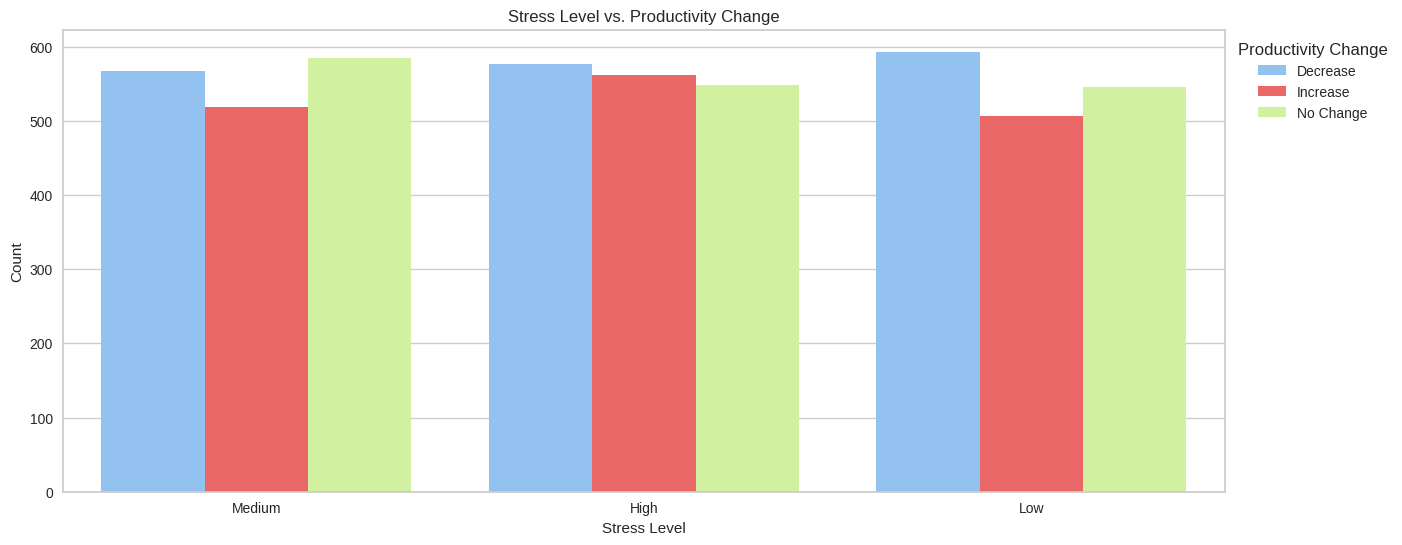

In [ ]:
# 壓力 vs 生產力:長條圖
colors = {'Decrease': '#84C1FF', 'No Change': '#D3FF93', 'Increase': '#FF5151'}
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Stress_Level', hue='Productivity_Change',palette=colors)
plt.title('Stress Level vs. Productivity Change')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Productivity Change', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

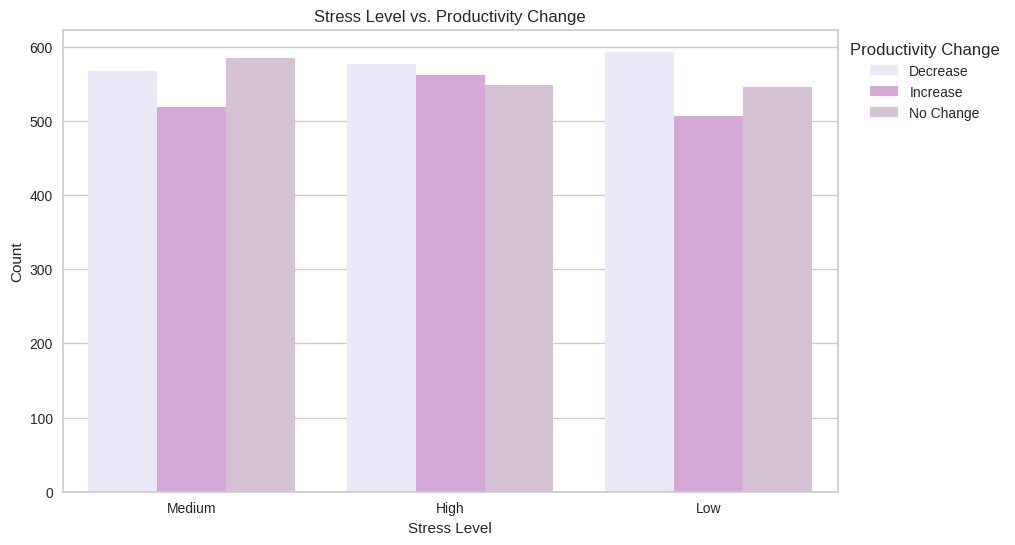

In [ ]:
colors = {'Decrease': '#E6E6FA', 'No Change': '#D8BFD8', 'Increase': '#DDA0DD'}  # 非常淺紫、淺紫、柔和紫
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Stress_Level', hue='Productivity_Change', palette=colors)
plt.title('Stress Level vs. Productivity Change')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Productivity Change', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()


##### 壓力 vs 睡眠指數

In [ ]:
set(df['Sleep_Quality'])

{'Average', 'Good', 'Poor'}

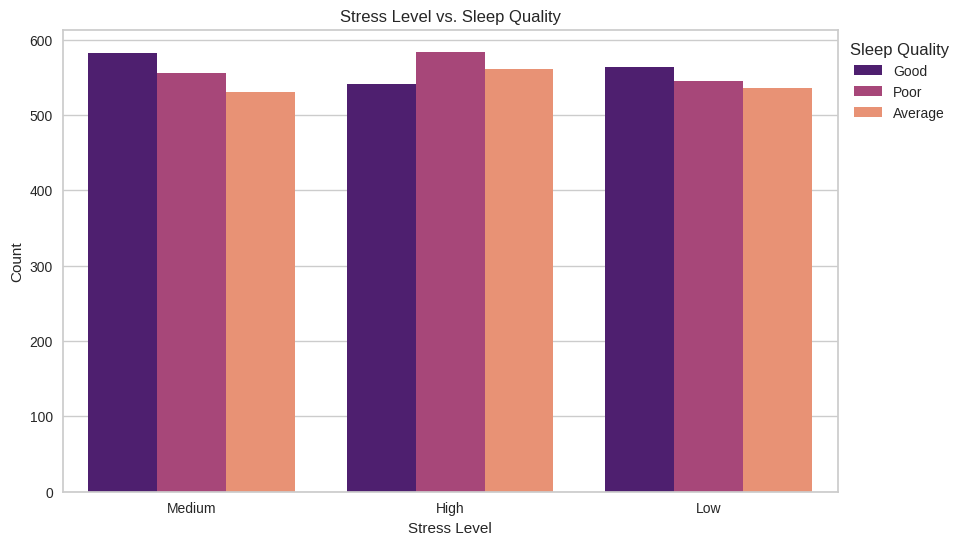

In [ ]:
# 壓力 vs 睡眠指數
colors = {'Poor': 'blue', 'Average': 'yellow', 'Good': 'green'}
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Stress_Level', hue='Sleep_Quality',palette='magma')
plt.title('Stress Level vs. Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()



*    在**低壓的狀態**下, 最多人感覺會降低生產力而且最少人感覺會增加生產力。 如果看**增加生產力的值**, 可以發現在高壓的狀態下最多人會感覺生產力增加

*    **睡眠品質好**的人中, 最多人是**壓力適中**的, 再來是低壓力。**睡眠品質不好**的人中, 最多人是處於**高壓狀態**



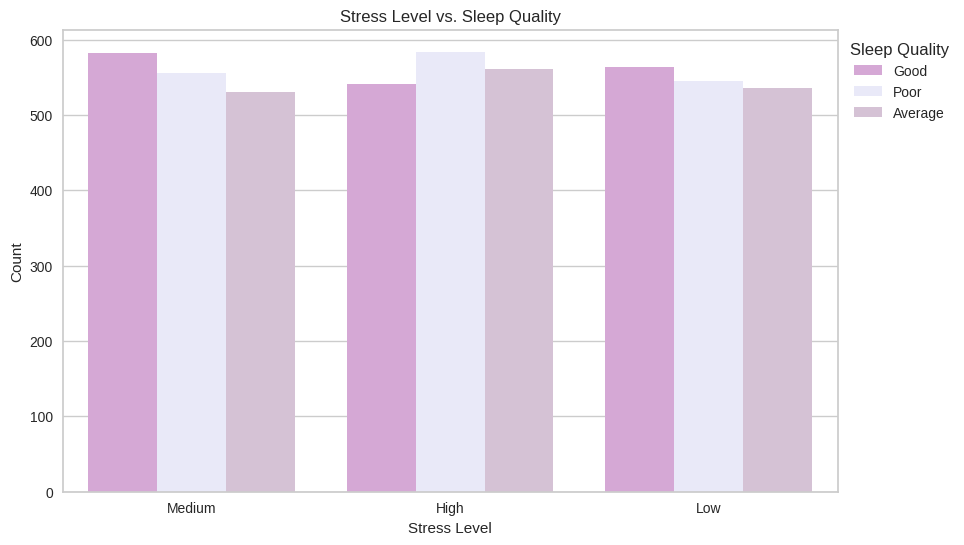

In [ ]:
colors = {'Poor': '#E6E6FA', 'Average': '#D8BFD8', 'Good': '#DDA0DD'}  # 非常淺紫、淺紫、柔和紫
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Stress_Level', hue='Sleep_Quality', palette=colors)
plt.title('Stress Level vs. Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()


#### 是否有獲取心理資源

In [ ]:
df['Access_to_Mental_Health_Resources']

0        No
1        No
2        No
3       Yes
4       Yes
       ... 
4995    Yes
4996    Yes
4997     No
4998    Yes
4999    Yes
Name: Access_to_Mental_Health_Resources, Length: 5000, dtype: object

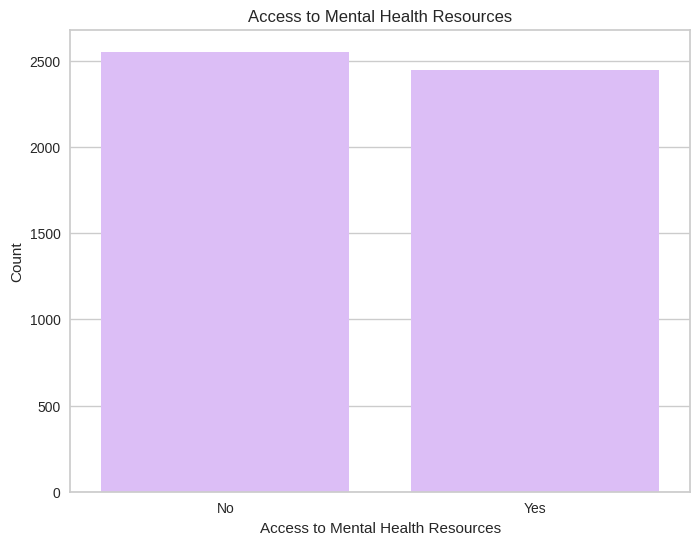

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Access_to_Mental_Health_Resources', data=df,color='#DCB5FF')
plt.title('Access to Mental Health Resources')
plt.xlabel('Access to Mental Health Resources')
plt.ylabel('Count')
plt.show()

yes跟no的分佈很平均

##### 是否有獲取心理資源 vs 工作型態

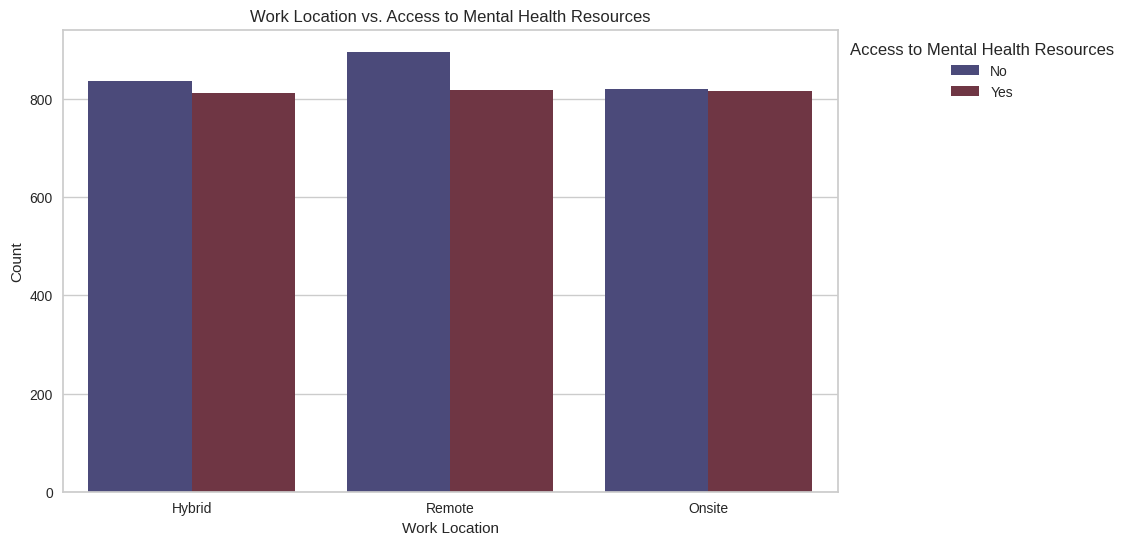

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Work_Location', hue='Access_to_Mental_Health_Resources',palette='icefire')
plt.title('Work Location vs. Access to Mental Health Resources')
plt.xlabel('Work Location')
plt.ylabel('Count')
plt.legend(title='Access to Mental Health Resources', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()


遠距工作最多人**沒有**去心理諮商

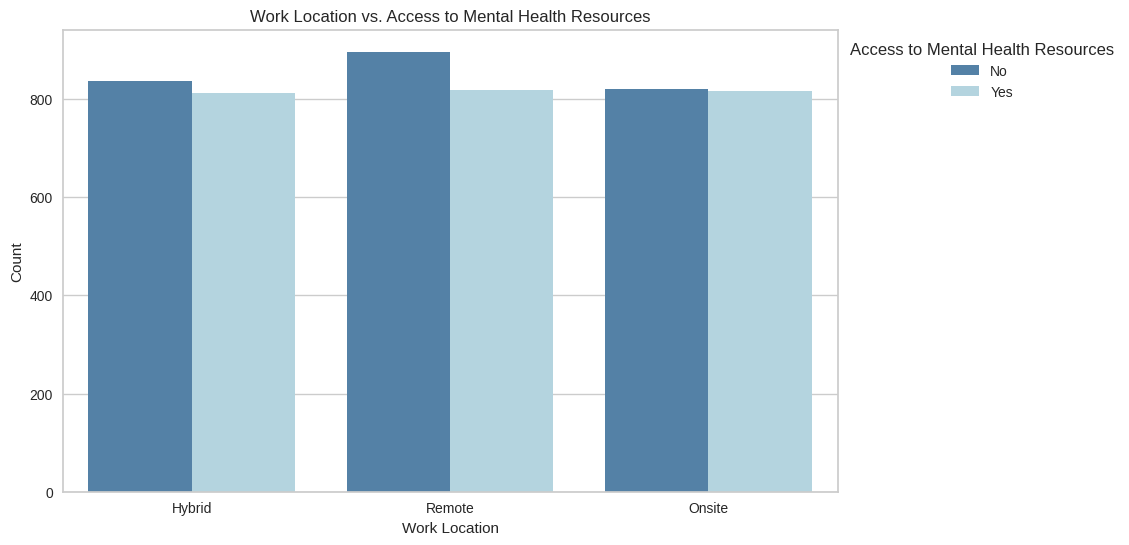

In [ ]:
colors = {'Yes': '#ADD8E6', 'No': '#4682B4'}  # 使用淺藍色和深藍色
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='Work_Location',
    hue='Access_to_Mental_Health_Resources',
    palette=colors
)
plt.title('Work Location vs. Access to Mental Health Resources')
plt.xlabel('Work Location')
plt.ylabel('Count')
plt.legend(title='Access to Mental Health Resources', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

#### 生產力

##### 生產力 vs 工作型態

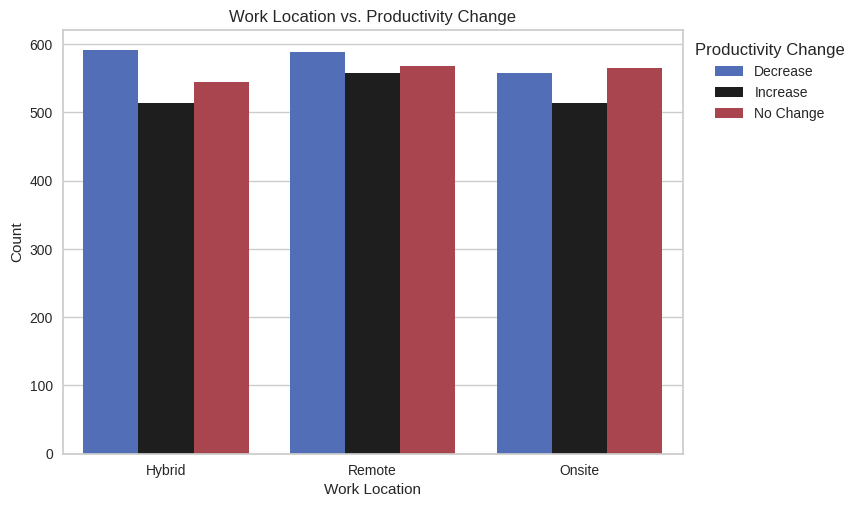

In [ ]:
# plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Work_Location', hue='Productivity_Change',palette='icefire')
plt.title('Work Location vs. Productivity Change')
plt.xlabel('Work Location')
plt.ylabel('Count')
plt.legend(title='Productivity Change', bbox_to_anchor=(1.00, 1), loc='upper left')
plt.show()

在遠距工作中, 不管是生產力增加還是減少的人數數都很多

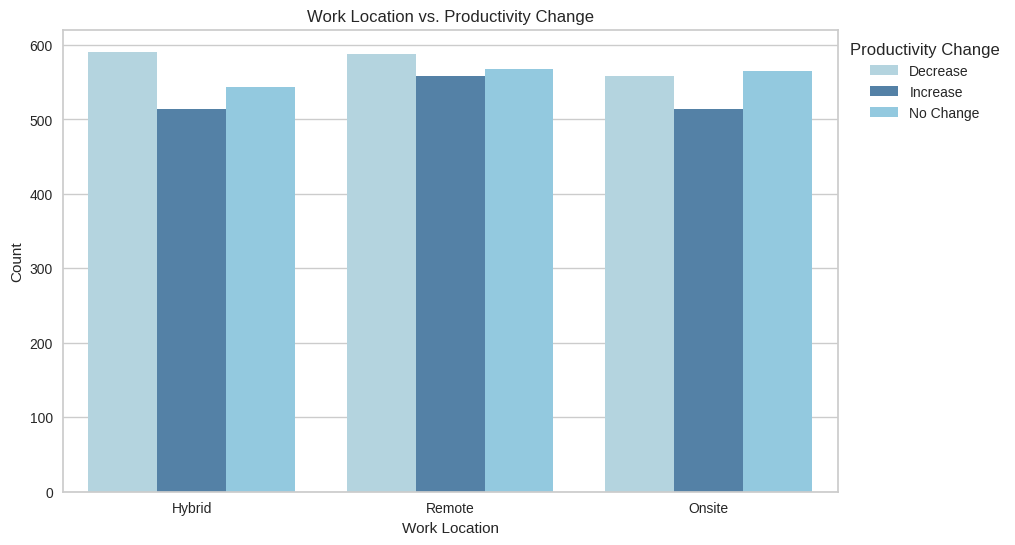

In [ ]:
colors = {'Decrease': '#ADD8E6', 'No Change': '#87CEEB', 'Increase': '#4682B4'}  # 淺藍、天藍、深藍
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Work_Location', hue='Productivity_Change', palette=colors)
plt.title('Work Location vs. Productivity Change')
plt.xlabel('Work Location')
plt.ylabel('Count')
plt.legend(title='Productivity Change', bbox_to_anchor=(1.00, 1), loc='upper left')
plt.show()


#### 運動頻率

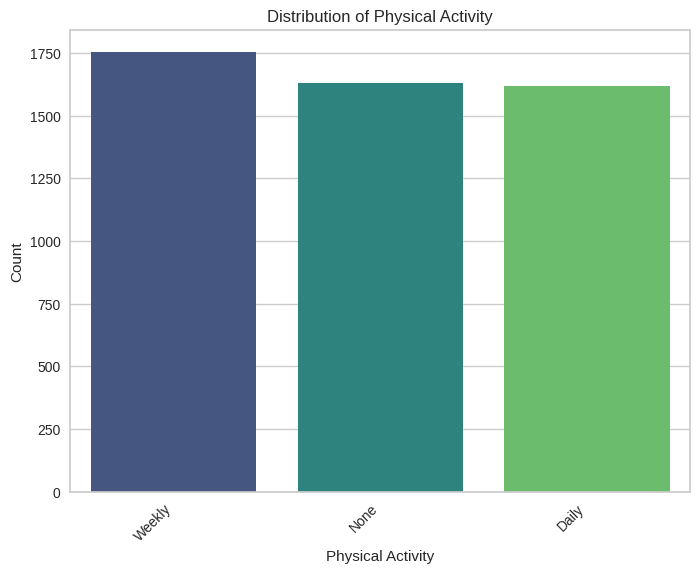

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Physical_Activity', data=df, palette='viridis')
plt.title('Distribution of Physical Activity')
plt.xlabel('Physical Activity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

每周運動的人數最多

##### 運動頻率 vs 心理健康狀態

In [ ]:
# 計算每個 Mental_Health_Condition 類別中 Physical_Activity 的比例
mental_health_activity = pd.crosstab(df['Mental_Health_Condition'], df['Physical_Activity'], normalize='index')
mental_health_activity
# 調整 Physical_Activity 的順序
mental_health_activity = mental_health_activity[['None', 'Weekly', 'Daily']]

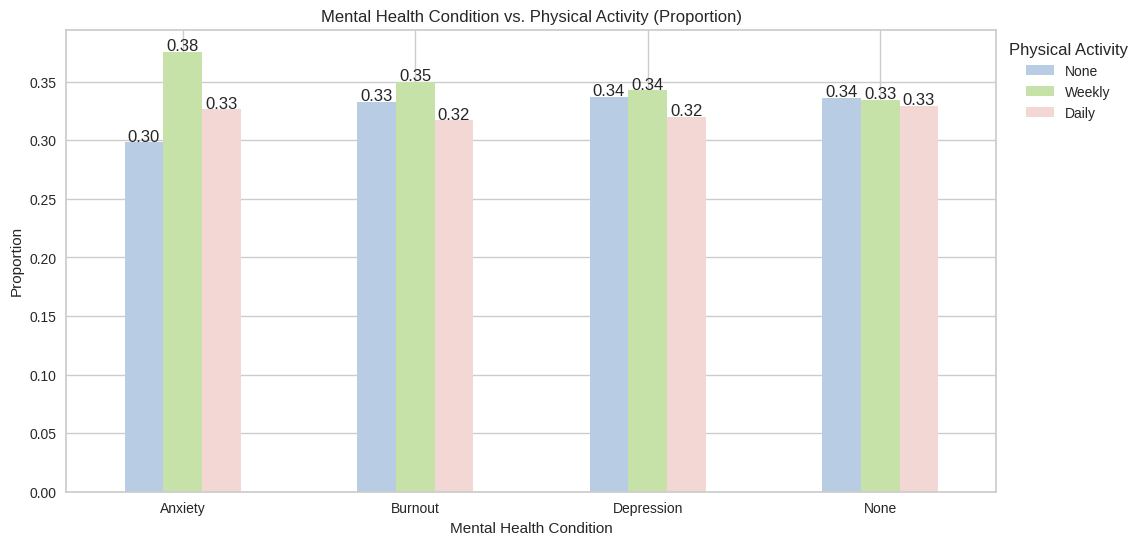

In [ ]:
# 繪製比例直方圖
ax = mental_health_activity.plot(kind='bar', figsize=(12, 6), color=['#B8CCE4', '#C6E2A9', '#F2D7D5', '#D3BBDD'])  # 使用莫蘭迪色系，並增加一個顏色
plt.title('Mental Health Condition vs. Physical Activity (Proportion)')
plt.xlabel('Mental Health Condition')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # 避免 x 軸標籤重疊
plt.legend(title='Physical Activity', bbox_to_anchor=(1.00, 1), loc='upper left')  # 更新圖例標題

# 顯示比例值
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width/2, y + height + 0.001), ha='center')

plt.show()

在焦慮的人群中, 每周運動習慣的比例是最高的

而且可以發現每周運動的比例在三種負面情緒的比例都是最高的

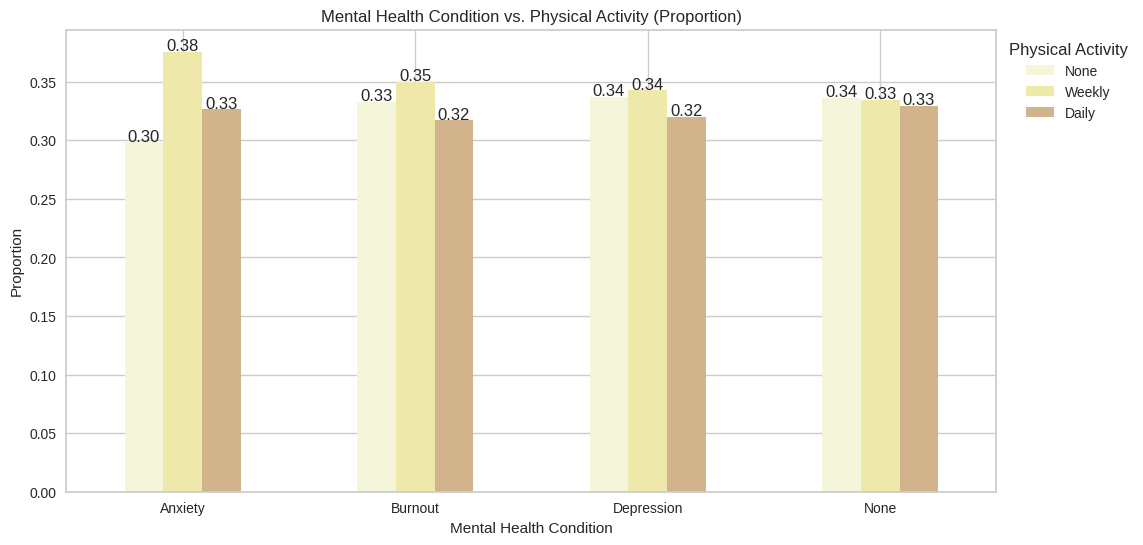

In [ ]:
ax = mental_health_activity.plot(
    kind='bar',
    figsize=(12, 6),
    color=['#F5F5DC', '#EEE8AA', '#D2B48C', '#C8AD7F']
)
plt.title('Mental Health Condition vs. Physical Activity (Proportion)')
plt.xlabel('Mental Health Condition')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # 避免 x 軸標籤重疊
plt.legend(title='Physical Activity', bbox_to_anchor=(1.00, 1), loc='upper left')  # 更新圖例標題

# 顯示比例值
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width/2, y + height + 0.001), ha='center')

plt.show()


##### 運動頻率 vs 壓力指數

In [ ]:
# 計算每個 Stress_Level 類別中 Physical_Activity 的比例
stress_activity = pd.crosstab(df['Stress_Level'], df['Physical_Activity'], normalize='index')
stress_activity
# 調整 Physical_Activity 的順序
stress_activity = stress_activity[['None', 'Weekly', 'Daily']]

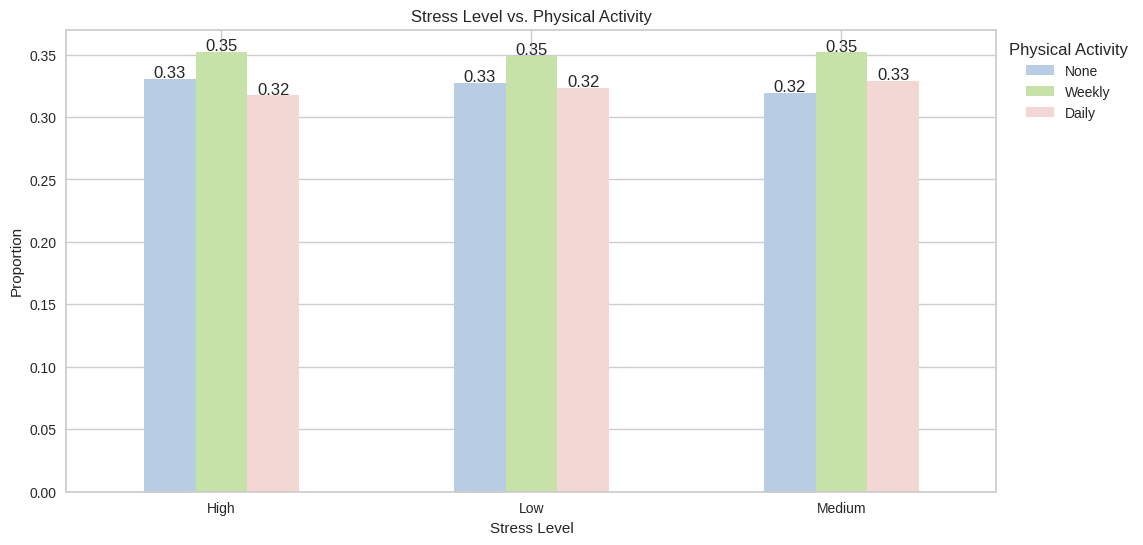

In [ ]:
# 繪製比例直方圖，使用 husl 色系
ax = stress_activity.plot(kind='bar', figsize=(12, 6), color=['#B8CCE4', '#C6E2A9','#F2D7D5'])  # 調整顏色數量
plt.title('Stress Level vs. Physical Activity')
plt.xlabel('Stress Level')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # 避免 x 軸標籤重疊
plt.legend(title='Physical Activity', bbox_to_anchor=(1.00, 1), loc='upper left')

# 顯示比例值
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width/2, y + height + 0.001), ha='center')

plt.show()

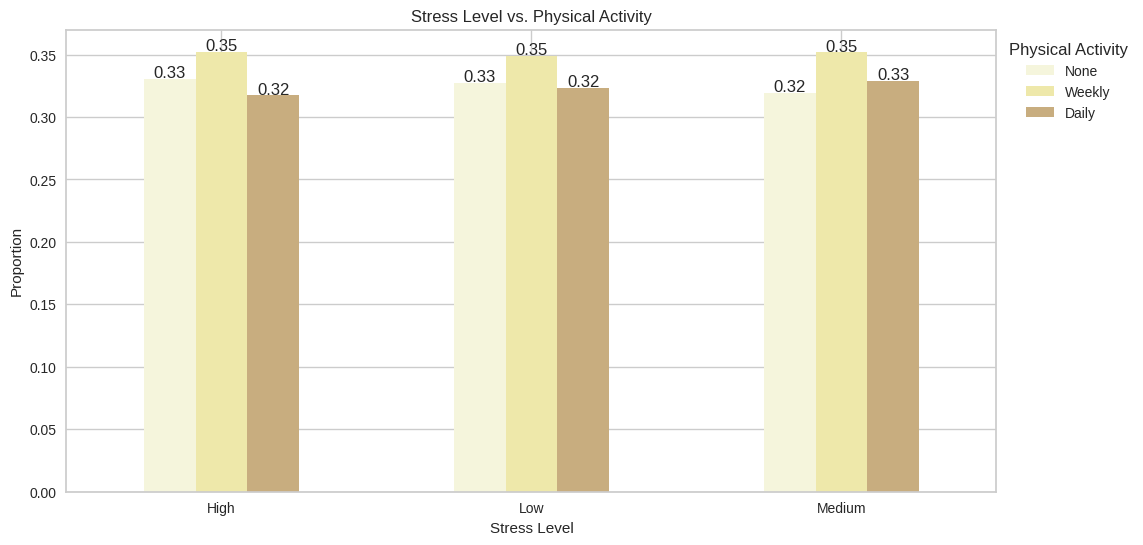

In [ ]:
ax = stress_activity.plot(
    kind='bar',
    figsize=(12, 6),
    color=['#F5F5DC', '#EEE8AA' ,'#C8AD7F']
)
plt.title('Stress Level vs. Physical Activity')
plt.xlabel('Stress Level')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # 避免 x 軸標籤重疊
plt.legend(title='Physical Activity', bbox_to_anchor=(1.00, 1), loc='upper left')

# 顯示比例值
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width/2, y + height + 0.001), ha='center')

plt.show()


## 特徵處理

In [ ]:
df

Employee_ID  Age      Gender           Job_Role    Industry  \
0        EMP0001   32  Non-binary                 HR  Healthcare   
1        EMP0002   40      Female     Data Scientist          IT   
2        EMP0003   59  Non-binary  Software Engineer   Education   
3        EMP0004   27        Male  Software Engineer     Finance   
4        EMP0005   49        Male              Sales  Consulting   
...          ...  ...         ...                ...         ...   
4995     EMP4996   32        Male              Sales  Consulting   
4996     EMP4997   39      Female              Sales  Healthcare   
4997     EMP4998   42      Female              Sales  Healthcare   
4998     EMP4999   27      Female              Sales  Healthcare   
4999     EMP5000   29        Male                 HR          IT   

      Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                      13        Hybrid                     47   
1                       3        Remote                     52   
2                      22        Hybrid                     46   
3                      20        Onsite                     32   
4                      32        Onsite                     35   
...                   ...           ...                    ...   
4995                    4        Onsite                     24   
4996                   27        Onsite                     48   
4997                   21        Hybrid                     34   
4998                   26        Remote                     58   
4999                   30        Onsite                     20   

      Number_of_Virtual_Meetings  Work_Life_Balance_Rating  ...  \
0                              7                         2  ...   
1                              4                         1  ...   
2                             11                         5  ...   
3                              8                         4  ...   
4                             12                         2  ...   
...                          ...                       ...  ...   
4995                           2                         5  ...   
4996                          15                         1  ...   
4997                           1                         4  ...   
4998                           0                         5  ...   
4999                          15                         1  ...   

     Access_to_Mental_Health_Resources Productivity_Change  \
0                                   No            Decrease   
1                                   No            Increase   
2                                   No           No Change   
3                                  Yes            Increase   
4                                  Yes            Decrease   
...                                ...                 ...   
4995                               Yes            Decrease   
4996                               Yes            Decrease   
4997                                No            Increase   
4998                               Yes            Increase   
4999                               Yes           No Change   

     Social_Isolation_Rating Satisfaction_with_Remote_Work  \
0                          1                   Unsatisfied   
1                          3                     Satisfied   
2                          4                   Unsatisfied   
3                          3                   Unsatisfied   
4                          3                   Unsatisfied   
...                      ...                           ...   
4995                       4                       Neutral   
4996                       1                     Satisfied   
4997                       3                     Satisfied   
4998                       3                   Unsatisfied   
4999                       3                   Unsatisfied   

      Company_Support_for_Remote_Work Physical_Activity  Sleep_Quality  \
0                         

### 心理健康狀況

你可以將 {'has_Mental_Health_Condition': 1, 'has_None': 0}

In [ ]:
# ' if x != 'None' else 'has_None
mental_health_mapping = {'has_Mental_Health_Condition': 1, 'has_None': 0}
df['Mental_Health_Category_num'] = df['Mental_Health_Category'].map(mental_health_mapping)



In [ ]:
df['Mental_Health_Category_num']

0       1
1       1
2       1
3       1
4       0
       ..
4995    1
4996    1
4997    1
4998    0
4999    1
Name: Mental_Health_Category_num, Length: 5000, dtype: int64

### 壓力指數


*   目前已經先將Stress_Level轉換成-1,0,1分別代表 'Low','Medium','High'(新增一個Stress_Level_Numeric的變數)




### 是否獲取心理健康資源

*   Access_to_Mental_Health_Resources欄位的Yes跟No, 改成1跟0, 並新增到新欄位Access_to_Mental_Health_Resources_Numeric

In [ ]:
access_mapping = {'No': 0, 'Yes': 1}
df['Access_to_Mental_Health_Resources_num'] = df['Access_to_Mental_Health_Resources'].map(access_mapping)
# df['Access_to_Mental_Health_Resources_num']

### 工作型態

將Work_Location的[Onsite,Hybrid,Remote]轉成[0,1,2]並新增到Degree_of_Remote_Working


In [ ]:
# df['Work_Location']

In [ ]:
location_mapping = {'Onsite': 0, 'Hybrid': 1, 'Remote': 2}
df['Degree_of_Remote_Working'] = df['Work_Location'].map(location_mapping)
# df['Degree_of_Remote_Working']

### 生產力

將Productivity_Change的[ Decrease, No Change , Increase]轉成[-1,0,1]

In [ ]:
# df['Productivity_Change']

In [ ]:
productivity_mapping = {'Decrease': -1, 'No Change': 0, 'Increase': 1}
df['Productivity_Change_Numeric'] = df['Productivity_Change'].map(productivity_mapping)
# df['Productivity_Change_Numeric']

### 對遠距工作的滿意度

將Satisfaction_with_Remote_Work的[ Unsatisfied, Neutral , Satisfied ]轉成[-1,0,1]

In [ ]:
satisfaction_mapping = {'Unsatisfied': -1, 'Neutral': 0, 'Satisfied': 1}
df['Satisfaction_with_Remote_Work_num'] = df['Satisfaction_with_Remote_Work'].map(satisfaction_mapping)
# df['Satisfaction_with_Remote_Work_num']

### 身體活動

將Physical_Activity的[ None,Daily,Weekly ]轉成[0,1,2]


In [ ]:
# df['Physical_Activity']

In [ ]:
physical_mapping = {'None': 0, 'Daily': 1, 'Weekly': 2}
df['Physical_Activity_num'] = df['Physical_Activity'].map(physical_mapping)
# df['Physical_Activity_num']

### 睡眠品質

將Sleep_Quality的[ Poor, Average , Good  ]轉成[-1,0,1]


In [ ]:
sleep_mapping = {'Poor': -1, 'Average': 0, 'Good': 1}
df['Sleep_Quality_num'] = df['Sleep_Quality'].map(sleep_mapping)
# df['Physical_Activity_num']

### 地區

對地區做Target encoding

In [ ]:
mean_target = df.groupby('Region')['Mental_Health_Category_num'].mean()
df['encoded_region'] = df['Region'].map(mean_target)
df['encoded_region']

0       0.760714
1       0.785283
2       0.756757
3       0.760714
4       0.756757
          ...   
4995    0.785283
4996    0.751163
4997    0.752018
4998    0.785283
4999    0.785283
Name: encoded_region, Length: 5000, dtype: float64

## 畫熱力圖

我們刪除與心理健康狀況與遠距工作無關的變數, 最後留下(目標變數: Mental_Health_Category_num)

1. Degree_of_Remote_Working(類別)
2. Hours_Worked_Per_Week(數值)
3. Number_of_Virtual_Meetings(數值)
4. Work_Life_Balance_Rating(類別)
5. Stress_Level_Numeric(類別)
6. Access_to_Mental_Health_Resources_Numeric(類別)
7. Productivity_Change_Numeric(類別)
8. Social_Isolation_Rating(類別)
9. Satisfaction_with_Remote_Work_num(類別)
10. Company_Support_for_Remote_Work(類別)
11. Physical_Activity_num(類別)
12. Sleep_Quality_num(類別)
13. encoded_region(編碼)

    

In [ ]:
new_col = ['Degree_of_Remote_Working', 'Hours_Worked_Per_Week',
      'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
      'Stress_Level_Numeric', 'Access_to_Mental_Health_Resources_num',
      'Productivity_Change_Numeric', 'Social_Isolation_Rating',
      'Satisfaction_with_Remote_Work_num', 'Company_Support_for_Remote_Work',
      'Physical_Activity_num', 'Sleep_Quality_num','encoded_region','Mental_Health_Category_num']

new_df = df[new_col]
new_df

Degree_of_Remote_Working  Hours_Worked_Per_Week  \
0                            1                     47   
1                            2                     52   
2                            1                     46   
3                            0                     32   
4                            0                     35   
...                        ...                    ...   
4995                         0                     24   
4996                         0                     48   
4997                         1                     34   
4998                         2                     58   
4999                         0                     20   

      Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
0                              7                         2   
1                              4                         1   
2                             11                         5   
3                              8                         4   
4                             12                         2   
...                          ...                       ...   
4995                           2                         5   
4996                          15                         1   
4997                           1                         4   
4998                           0                         5   
4999                          15                         1   

      Stress_Level_Numeric  Access_to_Mental_Health_Resources_num  \
0                        0                                      0   
1                        0                                      0   
2                        0                                      0   
3                        1                                      1   
4                        1                                      1   
...                    ...                                    ...   
4995                     1                                      1   
4996                    -1                                      1   
4997                     1                                      0   
4998                    -1                                      1   
4999                    -1                                      1   

      Productivity_Change_Numeric  Social_Isolation_Rating  \
0                              -1                        1   
1                               1                        3   
2                               0                        4   
3                               1                        3   
4                              -1                        3   
...                           ...                      ...   
4995                           -1                        4   
4996                           -1                        1   
4997                            1                        3   
4998                            1                        3   
4999                            0                        3   

      Satisfaction_with_Remote_Work_num  Company_Support_for_Remote_Work  \
0                                    -1                                1   
1                                     1                                2   
2                                    -1                                5   
3                                    -1                                3   
4                                    -1                                3   
...                                 ...                              ...   
4995                                  0                                1   
4996                                  1                                1   
4997                                  1                                1   
4998                                 -1                                4   
4999                                 -1                                5   

      Physical_Activity_num  Sleep_Quality_num  encoded_region  \
0                      

<Axes: >

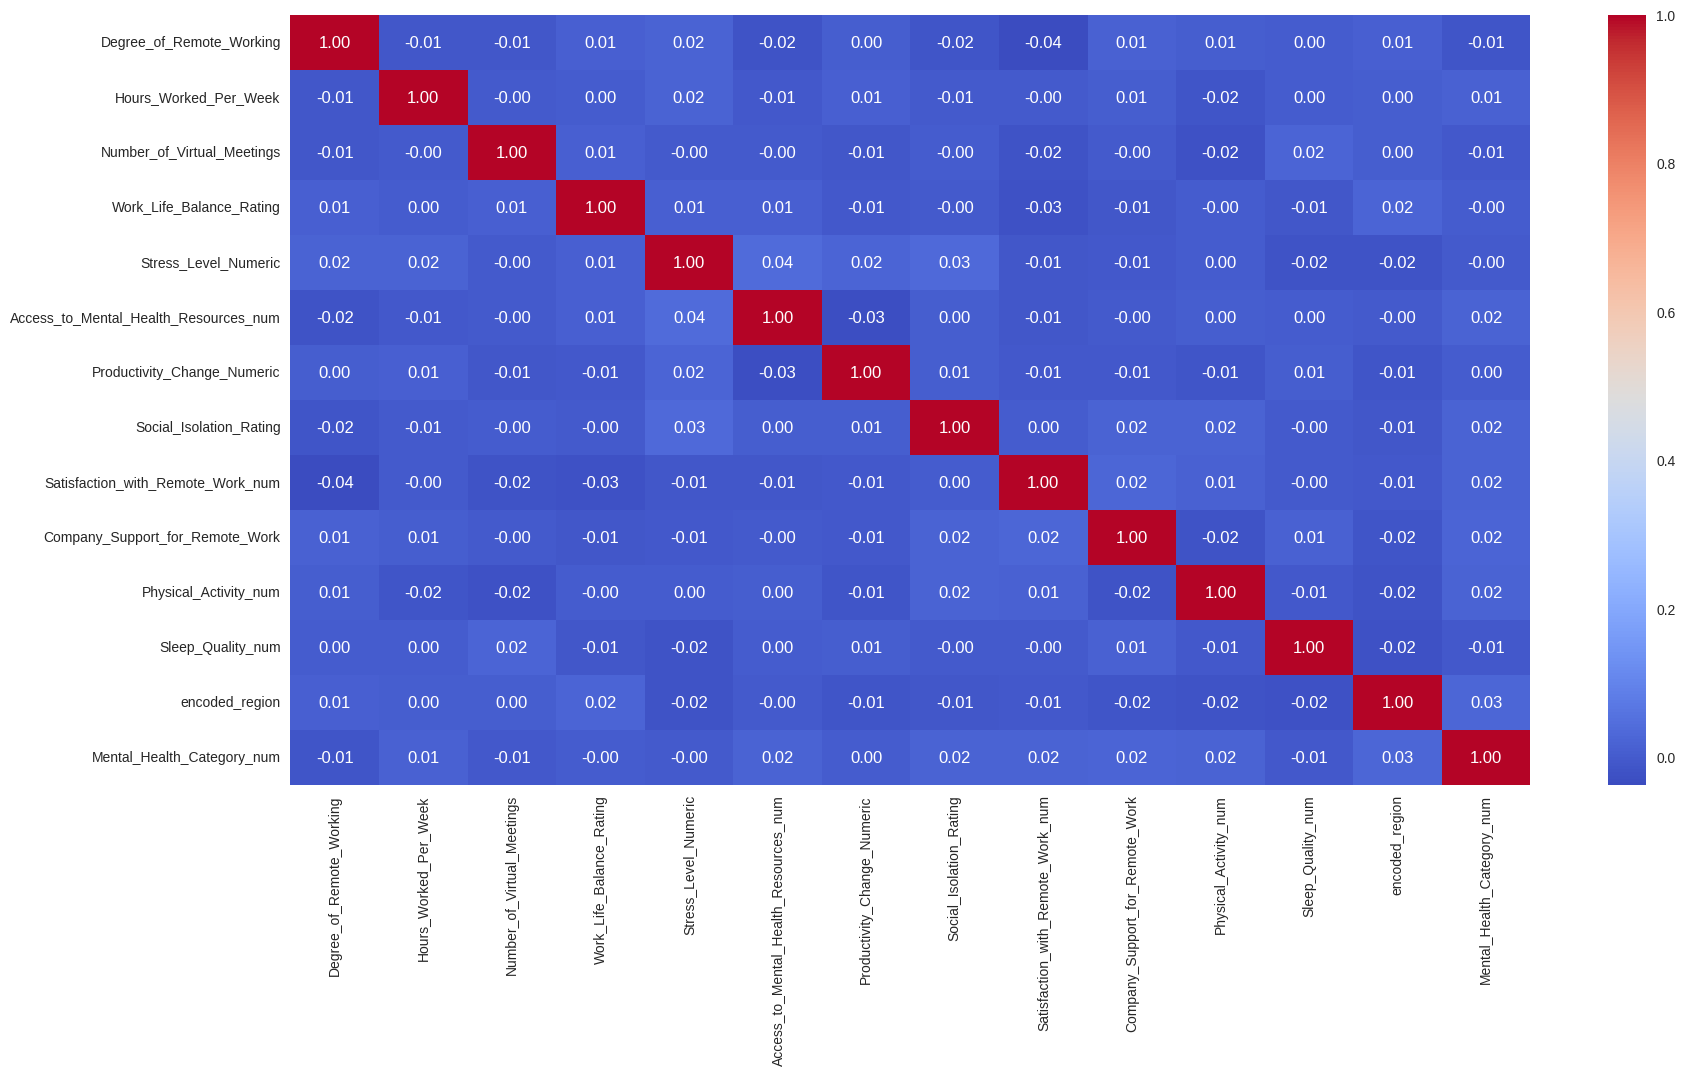

In [ ]:
new_df_corre = new_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(new_df_corre, annot=True, cmap='coolwarm', fmt=".2f")

當熱力圖顯示所有變數之間的相關性都很低時，表示這些變數之間可能沒有很強的線性關係
我覺得相關性低就是代表變數之間線性的關係很低，所以後續選模型的方向我們不會往線性模型的方向去做選擇

## 模型測試

# 三、資料不平衡處理 ＆模型測試

因為數據不平衡, 所以還是要去看看SMOTE

https://medium.com/%E6%95%B8%E5%AD%B8-%E4%BA%BA%E5%B7%A5%E6%99%BA%E6%85%A7%E8%88%87%E8%9F%92%E8%9B%87/smote-enn-%E8%A7%A3%E6%B1%BA%E6%95%B8%E6%93%9A%E4%B8%8D%E5%B9%B3%E8%A1%A1%E5%BB%BA%E6%A8%A1%E7%9A%84%E6%8E%A1%E6%A8%A3%E6%96%B9%E6%B3%95-cdb6324b711e

In [ ]:
new_col2 = ['Degree_of_Remote_Working', 'Hours_Worked_Per_Week',
      'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
      'Stress_Level_Numeric', 'Access_to_Mental_Health_Resources_num',
      'Productivity_Change_Numeric', 'Social_Isolation_Rating',
      'Satisfaction_with_Remote_Work_num', 'Company_Support_for_Remote_Work',
      'Physical_Activity_num', 'Sleep_Quality_num','encoded_region']

In [ ]:
# import sklearn
# import pycaret

# print(sklearn.__version__)
# print(pycaret.__version__)

# !pip install scikit-learn==1.0.2
# !pip install --upgrade pycaret scikit-learn pandas

In [ ]:
# 選擇特徵和目標變數
features = new_col2
target = 'Mental_Health_Category_num'

X = df[features]
y = df[target]

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# 建立和訓練模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 預測和評估
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy：{accuracy}")

Accuracy：0.752


In [ ]:
features

['Degree_of_Remote_Working',
 'Hours_Worked_Per_Week',
 'Number_of_Virtual_Meetings',
 'Work_Life_Balance_Rating',
 'Stress_Level_Numeric',
 'Access_to_Mental_Health_Resources_num',
 'Productivity_Change_Numeric',
 'Social_Isolation_Rating',
 'Satisfaction_with_Remote_Work_num',
 'Company_Support_for_Remote_Work',
 'Physical_Activity_num',
 'Sleep_Quality_num',
 'encoded_region']

In [ ]:
print(df.columns)

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region', 'Mental_Health_Category', 'Stress_Level_Numeric',
       'Mental_Health_Category_num', 'Access_to_Mental_Health_Resources_num',
       'Degree_of_Remote_Working', 'Productivity_Change_Numeric',
       'Satisfaction_with_Remote_Work_num', 'Physical_Activity_num',
       'Sleep_Quality_num', 'encoded_region'],
      dtype='object')


##  SMOTE 重新採樣

In [ ]:
print(X.columns)

Index(['Degree_of_Remote_Working', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level_Numeric', 'Access_to_Mental_Health_Resources_num',
       'Productivity_Change_Numeric', 'Social_Isolation_Rating',
       'Satisfaction_with_Remote_Work_num', 'Company_Support_for_Remote_Work',
       'Physical_Activity_num', 'Sleep_Quality_num', 'encoded_region'],
      dtype='object')


In [ ]:
# 使用 SMOTE 進行過採樣
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 查看重採樣後的類別分佈
print(f"SMOTE 後的訓練集類別分佈: {pd.Series(y_train_resampled).value_counts()}")

SMOTE 後的訓練集類別分佈: Mental_Health_Category_num
1    3052
0    3052
Name: count, dtype: int64


## 最佳模型測試

In [ ]:
features = new_col2  # 填入你想要使用的特徵
target = 'Mental_Health_Category_num'

In [ ]:
df = df[features + [target]]

In [ ]:
# 資料分割
df_train, df_test = train_test_split(df, test_size=0.2, random_state=2024)

In [ ]:
df_train

Degree_of_Remote_Working  Hours_Worked_Per_Week  \
4894                         0                     42   
2921                         2                     52   
2348                         0                     51   
3058                         2                     24   
2988                         0                     31   
...                        ...                    ...   
183                          0                     46   
2494                         0                     42   
2688                         0                     50   
2656                         1                     37   
3578                         2                     43   

      Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
4894                          15                         2   
2921                           7                         4   
2348                           2                         5   
3058                          11                         2   
2988                          15                         2   
...                          ...                       ...   
183                           14                         3   
2494                           0                         2   
2688                           4                         4   
2656                          10                         2   
3578                          12                         3   

      Stress_Level_Numeric  Access_to_Mental_Health_Resources_num  \
4894                    -1                                      0   
2921                     0                                      0   
2348                    -1                                      0   
3058                     1                                      1   
2988                     0                                      0   
...                    ...                                    ...   
183                      1                                      0   
2494                    -1                                      0   
2688                     1                                      1   
2656                     0                                      0   
3578                     1                                      1   

      Productivity_Change_Numeric  Social_Isolation_Rating  \
4894                            0                        1   
2921                           -1                        1   
2348                            1                        3   
3058                           -1                        4   
2988                            1                        3   
...                           ...                      ...   
183                             0                        3   
2494                            0                        2   
2688                           -1                        5   
2656                            1                        1   
3578                            1                        3   

      Satisfaction_with_Remote_Work_num  Company_Support_for_Remote_Work  \
4894                                  1                                3   
2921                                  0                                3   
2348                                  1                                3   
3058                                 -1                                2   
2988                                  1                                2   
...                                 ...                              ...   
183                                   0                                2   
2494                                  1                                4   
2688                                  1                                1   
2656                                  1                                2   
3578                                 -1                                2   

      Physical_Activity_num  Sleep_Quality_num  encoded_region  \
4894                   

#### 為訓練集做SMOTE

In [ ]:
# 對訓練資料執行 SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(df_train[features], df_train[target])

# 確認類別分佈
print(f"SMOTE 後的訓練集類別分佈: {pd.Series(y_train_resampled).value_counts()}")

SMOTE 後的訓練集類別分佈: Mental_Health_Category_num
1    3052
0    3052
Name: count, dtype: int64


In [ ]:
# 使用 SMOTE 處理後的資料重新構建 DataFrame
df_train_resampled = pd.concat([pd.DataFrame(X_train_resampled, columns=features),
                                pd.Series(y_train_resampled, name=target)], axis=1)
df_train_resampled

Degree_of_Remote_Working  Hours_Worked_Per_Week  \
0                            0                     42   
1                            2                     52   
2                            0                     51   
3                            2                     24   
4                            0                     31   
...                        ...                    ...   
6099                         1                     37   
6100                         1                     20   
6101                         2                     30   
6102                         0                     31   
6103                         1                     39   

      Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
0                             15                         2   
1                              7                         4   
2                              2                         5   
3                             11                         2   
4                             15                         2   
...                          ...                       ...   
6099                          11                         1   
6100                          11                         4   
6101                          11                         4   
6102                           1                         1   
6103                           6                         3   

      Stress_Level_Numeric  Access_to_Mental_Health_Resources_num  \
0                       -1                                      0   
1                        0                                      0   
2                       -1                                      0   
3                        1                                      1   
4                        0                                      0   
...                    ...                                    ...   
6099                     0                                      0   
6100                     0                                      0   
6101                     1                                      1   
6102                     0                                      1   
6103                     0                                      0   

      Productivity_Change_Numeric  Social_Isolation_Rating  \
0                               0                        1   
1                              -1                        1   
2                               1                        3   
3                              -1                        4   
4                               1                        3   
...                           ...                      ...   
6099                            1                        2   
6100                            0                        1   
6101                            1                        3   
6102                            0                        1   
6103                            0                        2   

      Satisfaction_with_Remote_Work_num  Company_Support_for_Remote_Work  \
0                                     1                                3   
1                                     0                                3   
2                                     1                                3   
3                                    -1                                2   
4                                     1                                2   
...                                 ...                              ...   
6099                                  0                                1   
6100                                  0                                2   
6101                                  0                                4   
6102                                  0                                2   
6103                                  1                                3   

      Physical_Activity_num  Sleep_Quality_num  encoded_region  \
0                      

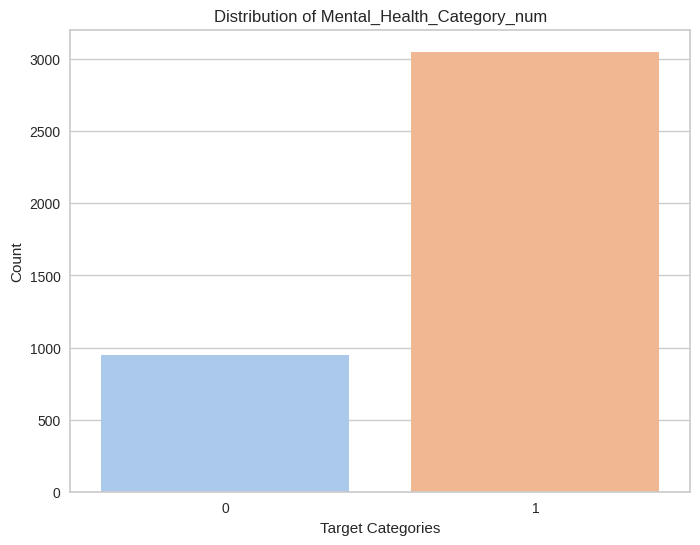

In [ ]:
# 原始的目標變數分布
target_counts = df_train[target].value_counts()
plt.figure(figsize=(8, 6))  # 設定圖表大小
sns.barplot(x=target_counts.index, y=target_counts.values, palette="pastel")  # 繪製長條圖
plt.title('Distribution of {}'.format(target))  # 設定圖表標題，使用 target 變數名稱
plt.xlabel('Target Categories')  # 設定 x 軸標籤
plt.ylabel('Count')  # 設定 y 軸標籤
plt.show()  # 顯示圖表


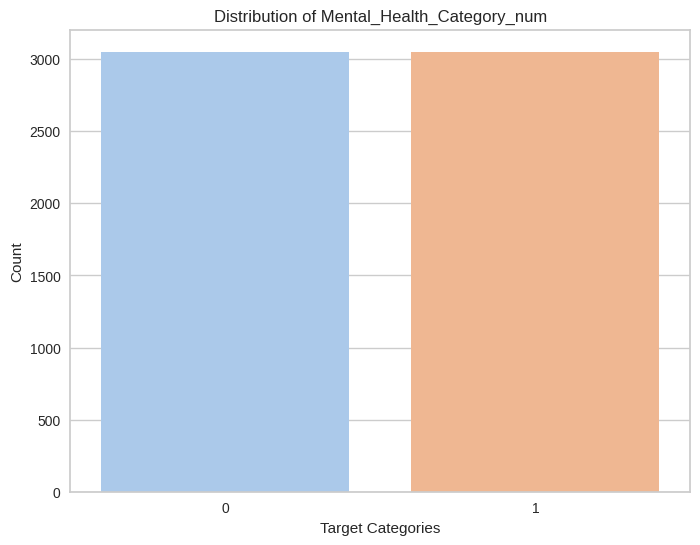

In [ ]:
target_counts = df_train_resampled[target].value_counts()
plt.figure(figsize=(8, 6))  # 設定圖表大小
sns.barplot(x=target_counts.index, y=target_counts.values, palette="pastel")  # 繪製長條圖
plt.title('Distribution of {}'.format(target))  # 設定圖表標題，使用 target 變數名稱
plt.xlabel('Target Categories')  # 設定 x 軸標籤
plt.ylabel('Count')  # 設定 y 軸標籤
plt.show()  # 顯示圖表


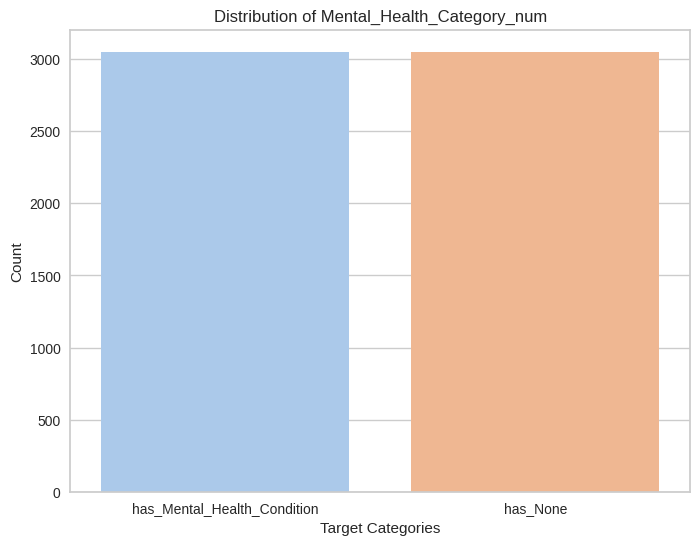

In [ ]:
# 目標變數分布（重新取樣後）
target_counts = df_train_resampled[target].value_counts()

# 修改類別名稱
target_counts.index = ['has_None' if x == 0 else 'has_Mental_Health_Condition' for x in target_counts.index]

plt.figure(figsize=(8, 6))  # 設定圖表大小
sns.barplot(x=target_counts.index, y=target_counts.values, palette="pastel")  # 繪製直向長條圖
plt.title('Distribution of {}'.format(target))  # 設定圖表標題，使用 target 變數名稱
plt.xlabel('Target Categories')  # 設定 x 軸標籤
plt.ylabel('Count')  # 設定 y 軸標籤
plt.show()  # 顯示圖表


In [ ]:
# 使用 SMOTE 處理後的資料進行 setup
se = setup(data=df_train_resampled,
      target=target,
      train_size=0.8,  # 已經平衡，不需要額外的 fix_imbalance
      fix_imbalance=False,
      normalize=True,
      session_id=2024)

In [ ]:
models = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

驗證集準確度排行：
1. catboost
2. lightgbm
3. gbc
4. xgboost
5. rf
6. et





In [ ]:
print(df_test[target].value_counts())


Mental_Health_Category_num
1    752
0    248
Name: count, dtype: int64


### Catboost Model

*   Catboost Model


模型簡介：CatBoost (Categorical Boosting) 是一種基於**梯度提升決策樹** (GBDT) 的機器學習演算法，由 Yandex 開發。它以其處理類別特徵的出色能力、高準確度和穩健性而聞名。

In [ ]:
catboost1 = create_model('catboost')
# 驗證集準確度

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# 測試集準確度
predict_model(catboost1, data=df_test, raw_score=True)

Degree_of_Remote_Working  Hours_Worked_Per_Week  \
355                          2                     58   
2891                         2                     35   
3411                         1                     28   
3594                         0                     23   
4710                         0                     35   
...                        ...                    ...   
4397                         0                     58   
125                          1                     60   
4119                         1                     35   
1816                         1                     27   
2612                         0                     54   

      Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
355                            3                         1   
2891                           1                         3   
3411                          11                         1   
3594                           7                         4   
4710                           6                         5   
...                          ...                       ...   
4397                           5                         4   
125                            1                         3   
4119                           6                         1   
1816                          15                         3   
2612                           6                         4   

      Stress_Level_Numeric  Access_to_Mental_Health_Resources_num  \
355                     -1                                      1   
2891                     1                                      0   
3411                    -1                                      1   
3594                     1                                      0   
4710                    -1                                      1   
...                    ...                                    ...   
4397                     1                                      1   
125                     -1                                      0   
4119                     1                                      1   
1816                     1                                      1   
2612                     0                                      0   

      Productivity_Change_Numeric  Social_Isolation_Rating  \
355                             1                        2   
2891                           -1                        5   
3411                            1                        4   
3594                            1                        2   
4710                           -1                        1   
...                           ...                      ...   
4397                            0                        5   
125                             1                        5   
4119                            0                        3   
1816                           -1                        5   
2612                            0                        2   

      Satisfaction_with_Remote_Work_num  Company_Support_for_Remote_Work  \
355                                   1                                2   
2891                                  0                                4   
3411                                  1                                1   
3594                                  1                                5   
4710                                  1                                3   
...                                 ...                              ...   
4397                                  1                                3   
125                                  -1                                4   
4119                                  0                                4   
1816                                  1                                3   
2612                                  1                                1   

      Physical_Activity_num  Sleep_Quality_num  encoded_region  \
355                    

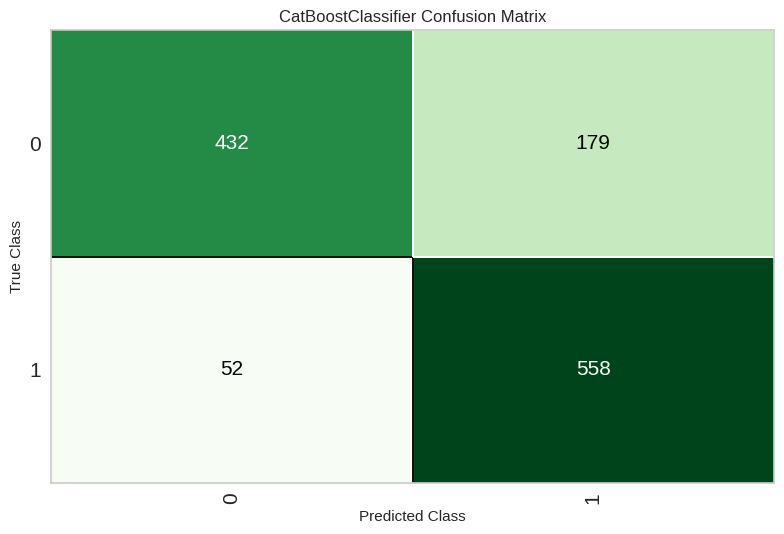

In [ ]:
plot_model(catboost1, 'confusion_matrix')

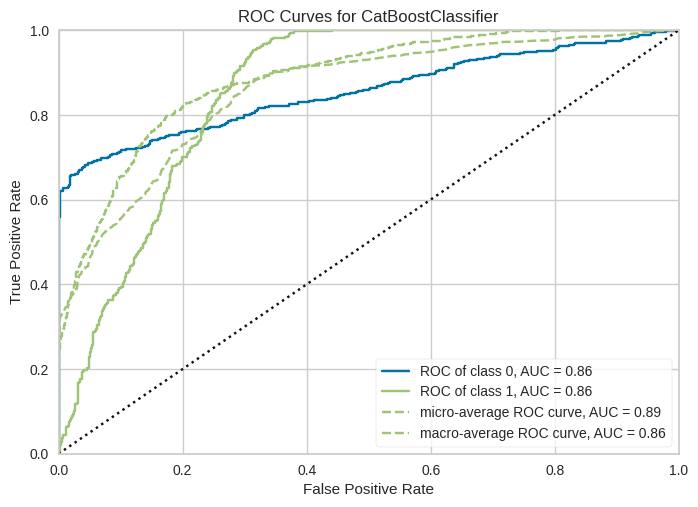

In [ ]:
plot_model(catboost1, plot = 'auc')

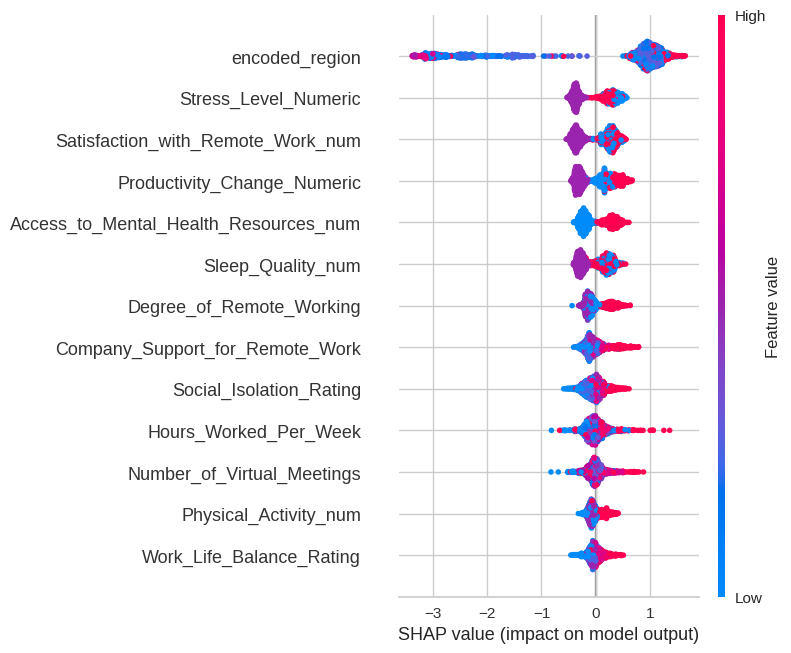

In [ ]:
interpret_model(catboost1)

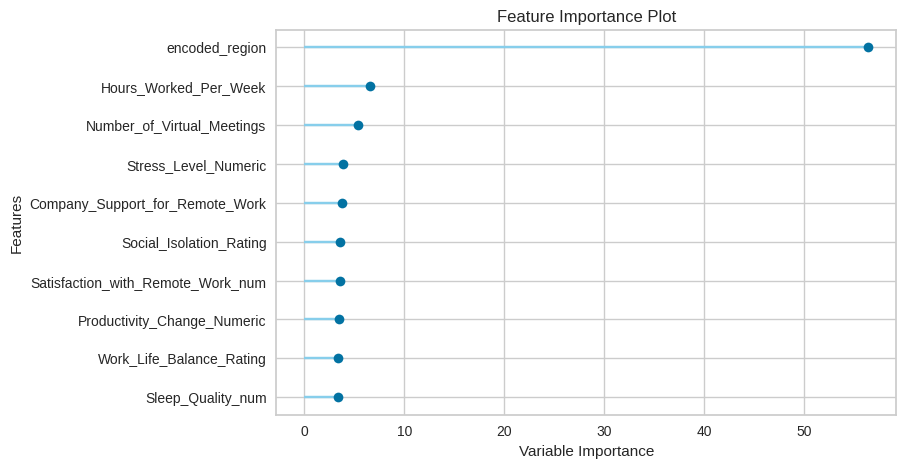

In [ ]:
plot_model(catboost1, plot='feature')

PredictionValuesChange 方法通過衡量移除一個特徵後模型預測值的變化程度來判斷該特徵的重要性。 變化越大，特徵越重要。

### Lightgbm Model

*   Lightgbm Model


模型簡介：Lightgbm Model是一種**基於決策樹**演算法的梯度提升框架，由微軟開發。它以其高效率、低記憶體使用和高準確度而聞名，特別適用於**處理大規模**數據集。



In [ ]:
light1 = create_model('lightgbm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
predict_model(light1, data=df_test)

Degree_of_Remote_Working  Hours_Worked_Per_Week  \
355                          2                     58   
2891                         2                     35   
3411                         1                     28   
3594                         0                     23   
4710                         0                     35   
...                        ...                    ...   
4397                         0                     58   
125                          1                     60   
4119                         1                     35   
1816                         1                     27   
2612                         0                     54   

      Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
355                            3                         1   
2891                           1                         3   
3411                          11                         1   
3594                           7                         4   
4710                           6                         5   
...                          ...                       ...   
4397                           5                         4   
125                            1                         3   
4119                           6                         1   
1816                          15                         3   
2612                           6                         4   

      Stress_Level_Numeric  Access_to_Mental_Health_Resources_num  \
355                     -1                                      1   
2891                     1                                      0   
3411                    -1                                      1   
3594                     1                                      0   
4710                    -1                                      1   
...                    ...                                    ...   
4397                     1                                      1   
125                     -1                                      0   
4119                     1                                      1   
1816                     1                                      1   
2612                     0                                      0   

      Productivity_Change_Numeric  Social_Isolation_Rating  \
355                             1                        2   
2891                           -1                        5   
3411                            1                        4   
3594                            1                        2   
4710                           -1                        1   
...                           ...                      ...   
4397                            0                        5   
125                             1                        5   
4119                            0                        3   
1816                           -1                        5   
2612                            0                        2   

      Satisfaction_with_Remote_Work_num  Company_Support_for_Remote_Work  \
355                                   1                                2   
2891                                  0                                4   
3411                                  1                                1   
3594                                  1                                5   
4710                                  1                                3   
...                                 ...                              ...   
4397                                  1                                3   
125                                  -1                                4   
4119                                  0                                4   
1816                                  1                                3   
2612                                  1                                1   

      Physical_Activity_num  Sleep_Quality_num  encoded_region  \
355                    

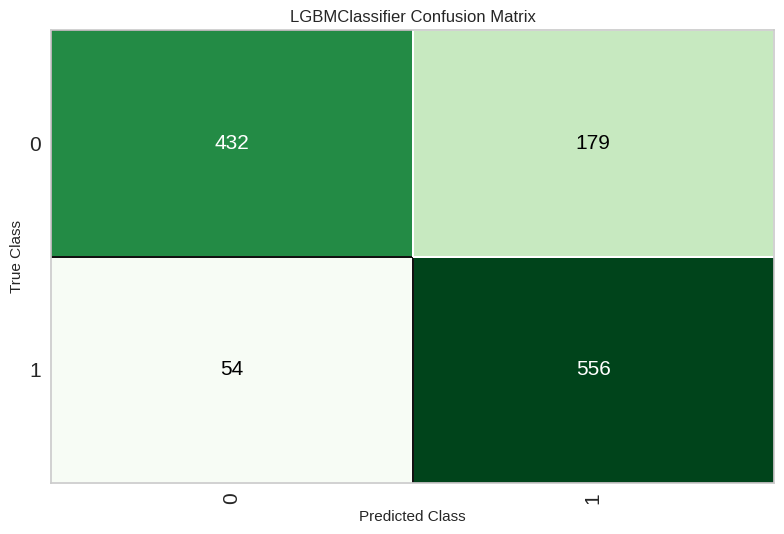

In [ ]:
plot_model(light1, plot='confusion_matrix')

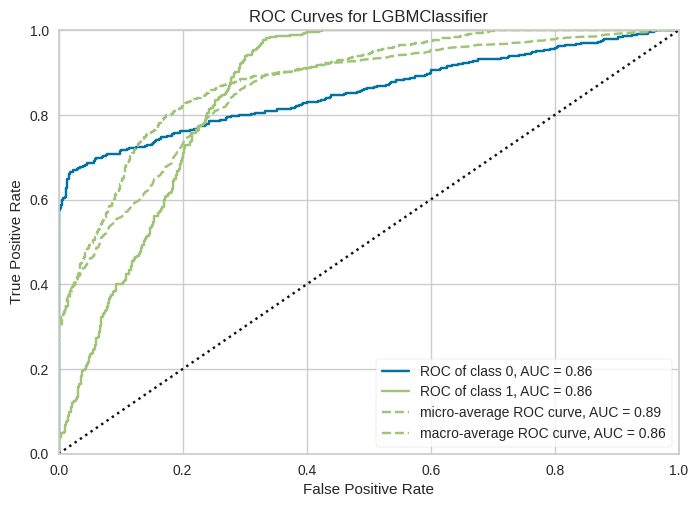

In [ ]:
plot_model(light1, plot = 'auc')

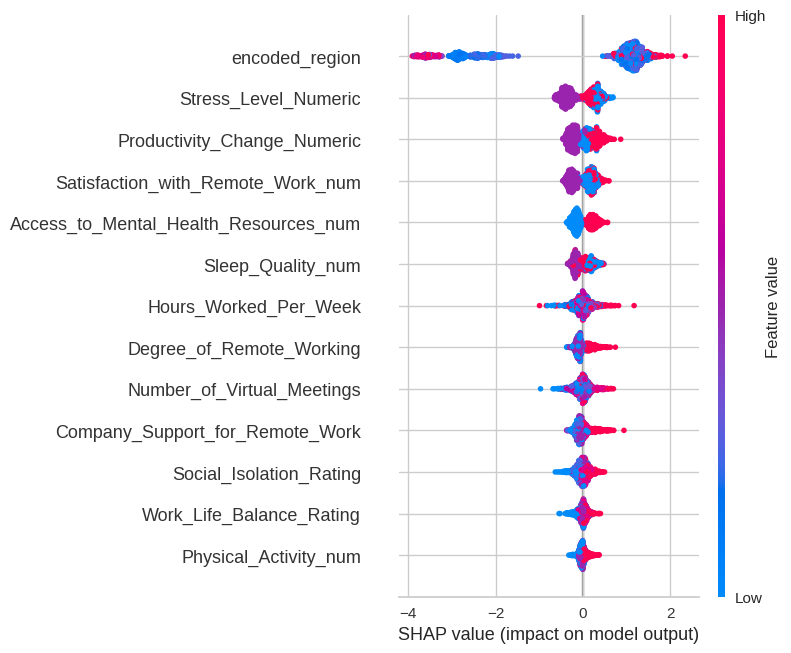

In [ ]:
interpret_model(light1)

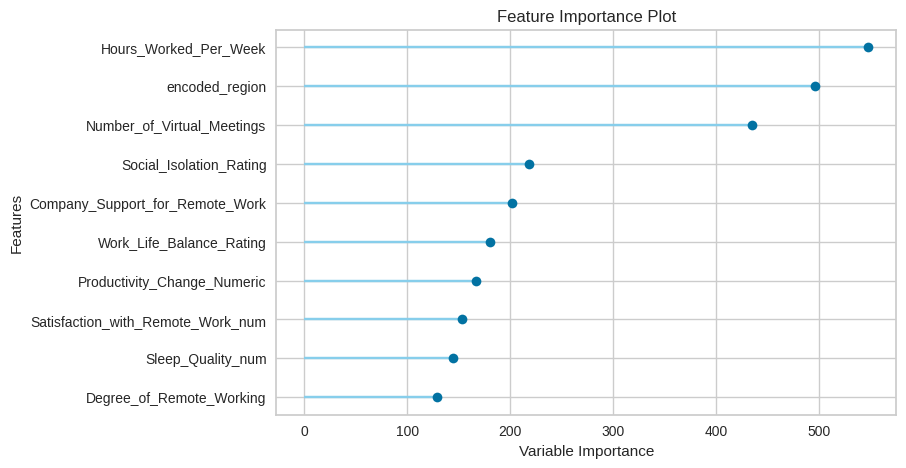

In [ ]:
plot_model(light1, plot='feature')

### GBC Model

*   梯度提升樹 (Gradient Boosting Classifier)



模型簡介：通過將多個弱學習器（通常是決策樹）組合在一起來提高分類性能。




In [ ]:
gbc1 = create_model('gbc')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
predict_model(gbc1, data=df_test)

Degree_of_Remote_Working  Hours_Worked_Per_Week  \
355                          2                     58   
2891                         2                     35   
3411                         1                     28   
3594                         0                     23   
4710                         0                     35   
...                        ...                    ...   
4397                         0                     58   
125                          1                     60   
4119                         1                     35   
1816                         1                     27   
2612                         0                     54   

      Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
355                            3                         1   
2891                           1                         3   
3411                          11                         1   
3594                           7                         4   
4710                           6                         5   
...                          ...                       ...   
4397                           5                         4   
125                            1                         3   
4119                           6                         1   
1816                          15                         3   
2612                           6                         4   

      Stress_Level_Numeric  Access_to_Mental_Health_Resources_num  \
355                     -1                                      1   
2891                     1                                      0   
3411                    -1                                      1   
3594                     1                                      0   
4710                    -1                                      1   
...                    ...                                    ...   
4397                     1                                      1   
125                     -1                                      0   
4119                     1                                      1   
1816                     1                                      1   
2612                     0                                      0   

      Productivity_Change_Numeric  Social_Isolation_Rating  \
355                             1                        2   
2891                           -1                        5   
3411                            1                        4   
3594                            1                        2   
4710                           -1                        1   
...                           ...                      ...   
4397                            0                        5   
125                             1                        5   
4119                            0                        3   
1816                           -1                        5   
2612                            0                        2   

      Satisfaction_with_Remote_Work_num  Company_Support_for_Remote_Work  \
355                                   1                                2   
2891                                  0                                4   
3411                                  1                                1   
3594                                  1                                5   
4710                                  1                                3   
...                                 ...                              ...   
4397                                  1                                3   
125                                  -1                                4   
4119                                  0                                4   
1816                                  1                                3   
2612                                  1                                1   

      Physical_Activity_num  Sleep_Quality_num  encoded_region  \
355                    

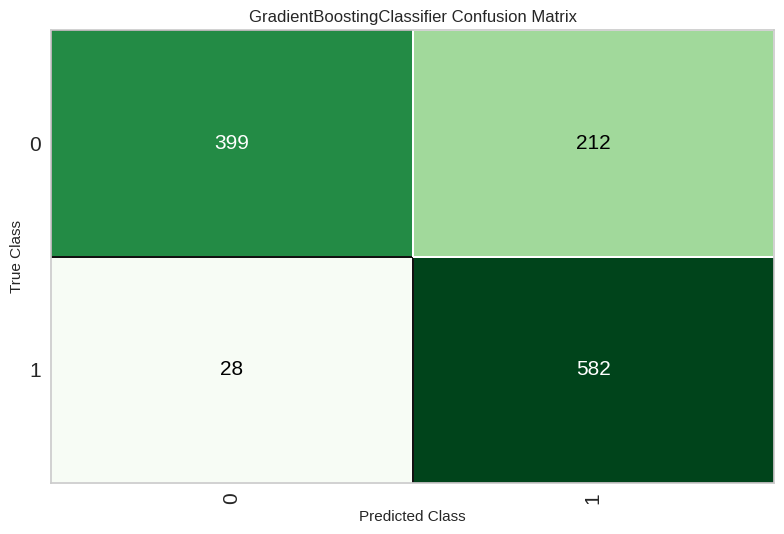

In [ ]:
plot_model(gbc1, plot='confusion_matrix')

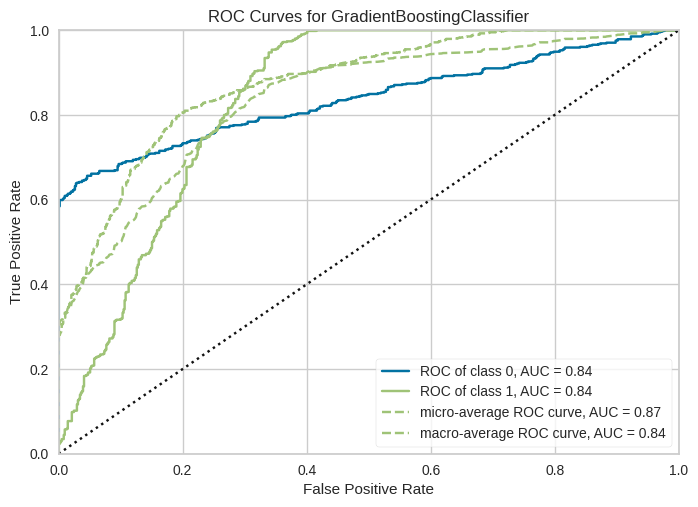

In [ ]:
plot_model(gbc1, plot = 'auc')

In [ ]:
# interpret_model(gbc1)
# 不能SHAP

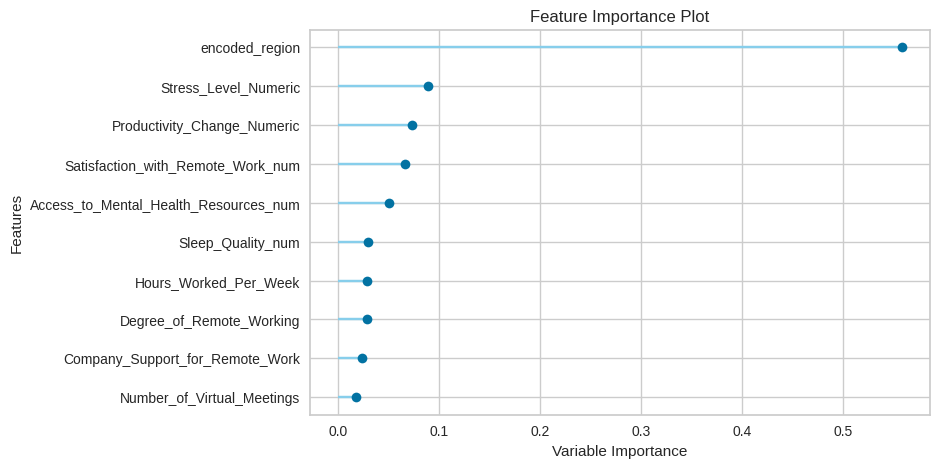

In [ ]:
plot_model(gbc1, plot='feature')

### XGboost Model

*   Extreme Gradient Boosting(xgboost)


模型簡介：Extreme Gradient Boosting是一種基於梯度提升決策樹 (GBDT) 的機器學習演算法。



In [ ]:
xgb1 = create_model('xgboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
predict_model(xgb1, data=df_test)

Degree_of_Remote_Working  Hours_Worked_Per_Week  \
355                          2                     58   
2891                         2                     35   
3411                         1                     28   
3594                         0                     23   
4710                         0                     35   
...                        ...                    ...   
4397                         0                     58   
125                          1                     60   
4119                         1                     35   
1816                         1                     27   
2612                         0                     54   

      Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
355                            3                         1   
2891                           1                         3   
3411                          11                         1   
3594                           7                         4   
4710                           6                         5   
...                          ...                       ...   
4397                           5                         4   
125                            1                         3   
4119                           6                         1   
1816                          15                         3   
2612                           6                         4   

      Stress_Level_Numeric  Access_to_Mental_Health_Resources_num  \
355                     -1                                      1   
2891                     1                                      0   
3411                    -1                                      1   
3594                     1                                      0   
4710                    -1                                      1   
...                    ...                                    ...   
4397                     1                                      1   
125                     -1                                      0   
4119                     1                                      1   
1816                     1                                      1   
2612                     0                                      0   

      Productivity_Change_Numeric  Social_Isolation_Rating  \
355                             1                        2   
2891                           -1                        5   
3411                            1                        4   
3594                            1                        2   
4710                           -1                        1   
...                           ...                      ...   
4397                            0                        5   
125                             1                        5   
4119                            0                        3   
1816                           -1                        5   
2612                            0                        2   

      Satisfaction_with_Remote_Work_num  Company_Support_for_Remote_Work  \
355                                   1                                2   
2891                                  0                                4   
3411                                  1                                1   
3594                                  1                                5   
4710                                  1                                3   
...                                 ...                              ...   
4397                                  1                                3   
125                                  -1                                4   
4119                                  0                                4   
1816                                  1                                3   
2612                                  1                                1   

      Physical_Activity_num  Sleep_Quality_num  encoded_region  \
355                    

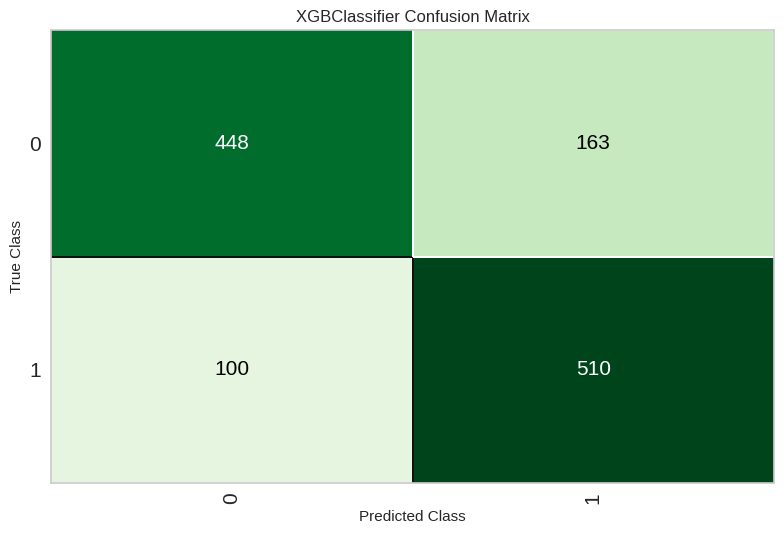

In [ ]:
plot_model(xgb1, plot='confusion_matrix')

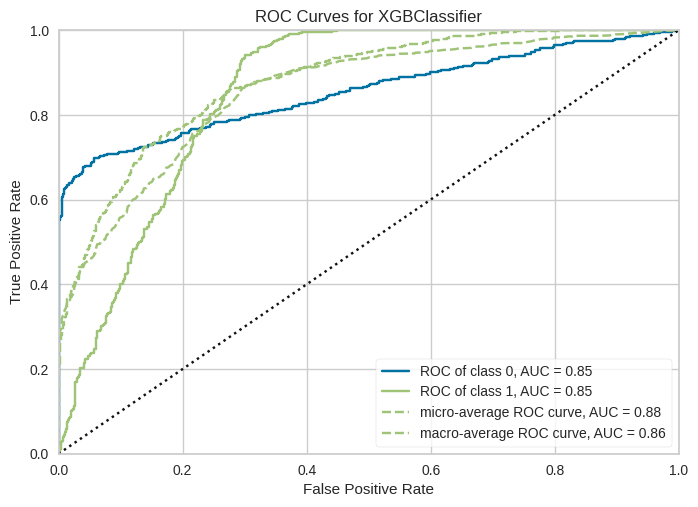

In [ ]:
plot_model(xgb1, plot = 'auc')

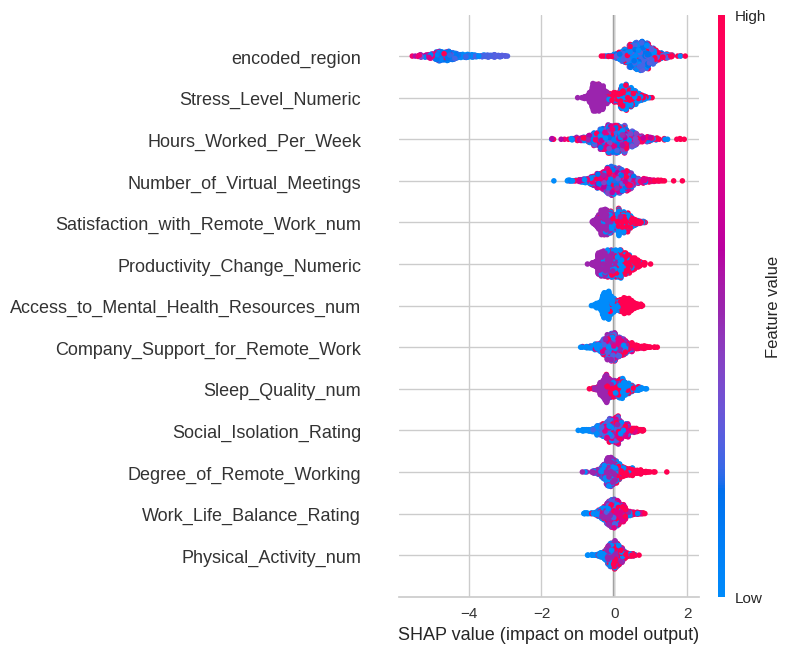

In [ ]:
interpret_model(xgb1)

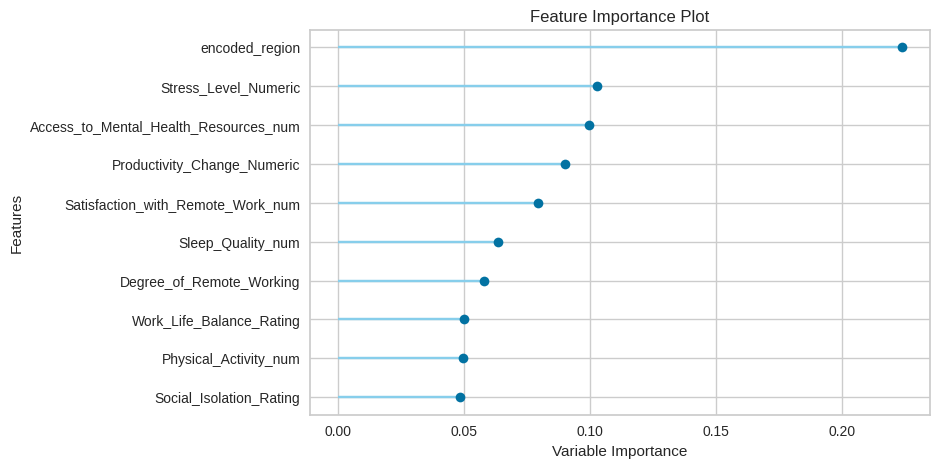

In [ ]:
plot_model(xgb1, plot='feature')

### Random Forest Model

*   Random Forest Classifier(RF)


模型簡介：Random Forest Classifier是一種結合了多個決策樹的預測結果來提升整體模型的準確度和穩定性的方法，常用於分類問題。


In [ ]:
rf1 = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
predict_model(rf1, data=df_test)

Degree_of_Remote_Working  Hours_Worked_Per_Week  \
355                          2                     58   
2891                         2                     35   
3411                         1                     28   
3594                         0                     23   
4710                         0                     35   
...                        ...                    ...   
4397                         0                     58   
125                          1                     60   
4119                         1                     35   
1816                         1                     27   
2612                         0                     54   

      Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
355                            3                         1   
2891                           1                         3   
3411                          11                         1   
3594                           7                         4   
4710                           6                         5   
...                          ...                       ...   
4397                           5                         4   
125                            1                         3   
4119                           6                         1   
1816                          15                         3   
2612                           6                         4   

      Stress_Level_Numeric  Access_to_Mental_Health_Resources_num  \
355                     -1                                      1   
2891                     1                                      0   
3411                    -1                                      1   
3594                     1                                      0   
4710                    -1                                      1   
...                    ...                                    ...   
4397                     1                                      1   
125                     -1                                      0   
4119                     1                                      1   
1816                     1                                      1   
2612                     0                                      0   

      Productivity_Change_Numeric  Social_Isolation_Rating  \
355                             1                        2   
2891                           -1                        5   
3411                            1                        4   
3594                            1                        2   
4710                           -1                        1   
...                           ...                      ...   
4397                            0                        5   
125                             1                        5   
4119                            0                        3   
1816                           -1                        5   
2612                            0                        2   

      Satisfaction_with_Remote_Work_num  Company_Support_for_Remote_Work  \
355                                   1                                2   
2891                                  0                                4   
3411                                  1                                1   
3594                                  1                                5   
4710                                  1                                3   
...                                 ...                              ...   
4397                                  1                                3   
125                                  -1                                4   
4119                                  0                                4   
1816                                  1                                3   
2612                                  1                                1   

      Physical_Activity_num  Sleep_Quality_num  encoded_region  \
355                    

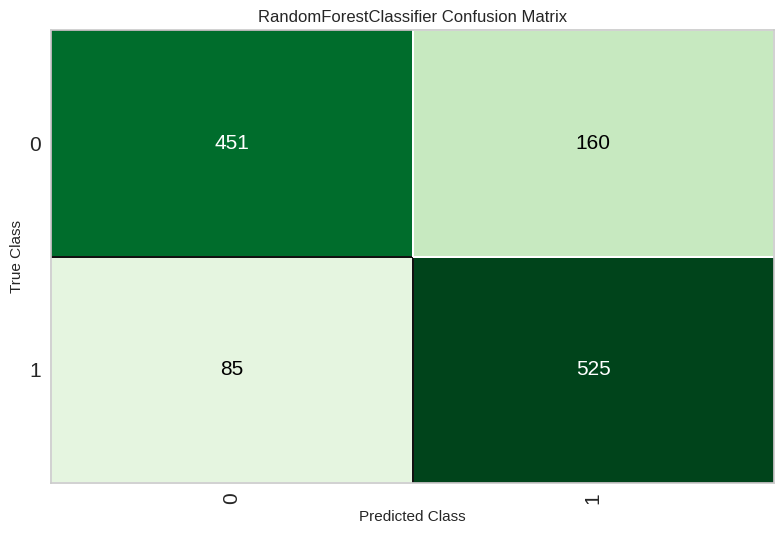

In [ ]:
plot_model(rf1, plot='confusion_matrix')

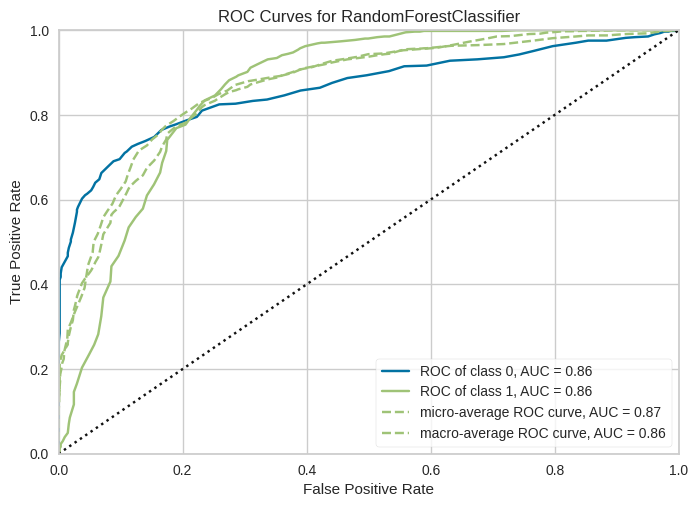

In [ ]:
plot_model(rf1, plot = 'auc')

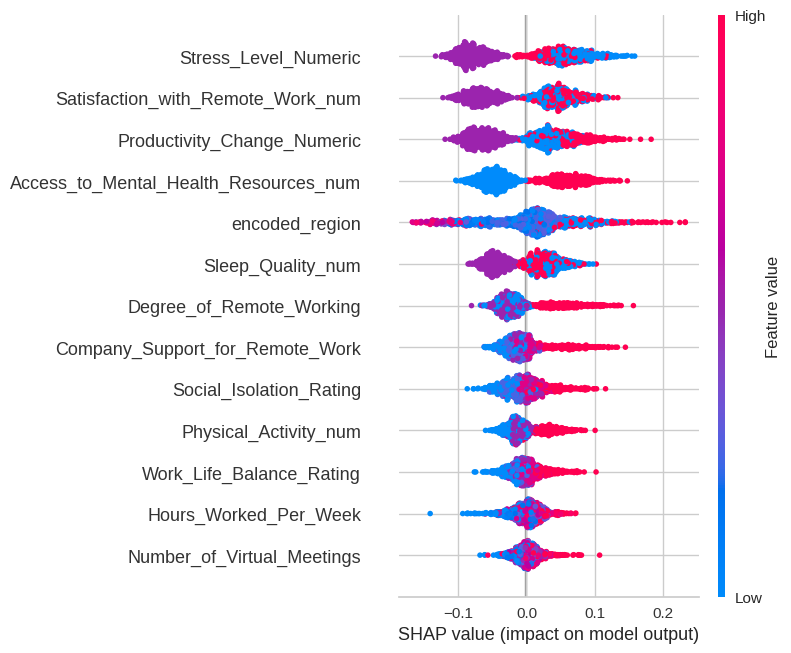

In [ ]:
interpret_model(rf1)

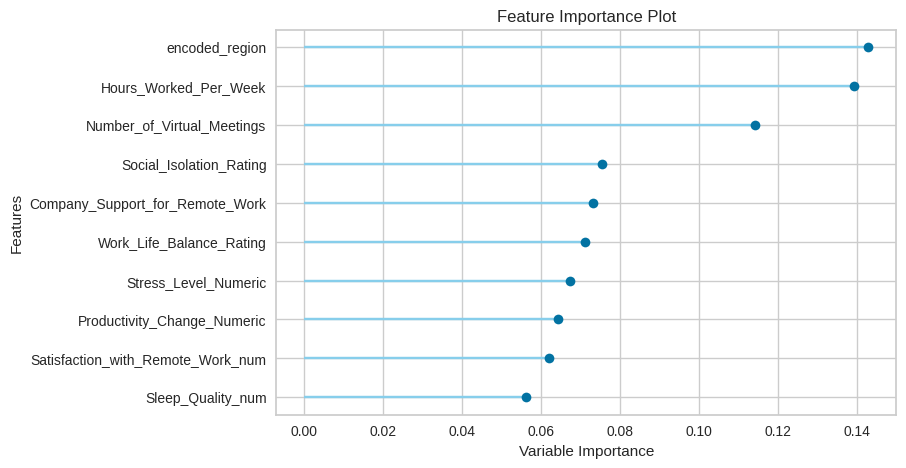

In [ ]:
plot_model(rf1, plot='feature')

### Extra Trees Model

*   Extra Trees Classifier(et)


模型簡介：Random Forest Classifier是一種結合了多個決策樹的預測結果來提升整體模型的準確度和穩定性的方法，常用於分類問題。


In [ ]:
et1 = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
predict_model(et1, data=df_test)

Degree_of_Remote_Working  Hours_Worked_Per_Week  \
355                          2                     58   
2891                         2                     35   
3411                         1                     28   
3594                         0                     23   
4710                         0                     35   
...                        ...                    ...   
4397                         0                     58   
125                          1                     60   
4119                         1                     35   
1816                         1                     27   
2612                         0                     54   

      Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
355                            3                         1   
2891                           1                         3   
3411                          11                         1   
3594                           7                         4   
4710                           6                         5   
...                          ...                       ...   
4397                           5                         4   
125                            1                         3   
4119                           6                         1   
1816                          15                         3   
2612                           6                         4   

      Stress_Level_Numeric  Access_to_Mental_Health_Resources_num  \
355                     -1                                      1   
2891                     1                                      0   
3411                    -1                                      1   
3594                     1                                      0   
4710                    -1                                      1   
...                    ...                                    ...   
4397                     1                                      1   
125                     -1                                      0   
4119                     1                                      1   
1816                     1                                      1   
2612                     0                                      0   

      Productivity_Change_Numeric  Social_Isolation_Rating  \
355                             1                        2   
2891                           -1                        5   
3411                            1                        4   
3594                            1                        2   
4710                           -1                        1   
...                           ...                      ...   
4397                            0                        5   
125                             1                        5   
4119                            0                        3   
1816                           -1                        5   
2612                            0                        2   

      Satisfaction_with_Remote_Work_num  Company_Support_for_Remote_Work  \
355                                   1                                2   
2891                                  0                                4   
3411                                  1                                1   
3594                                  1                                5   
4710                                  1                                3   
...                                 ...                              ...   
4397                                  1                                3   
125                                  -1                                4   
4119                                  0                                4   
1816                                  1                                3   
2612                                  1                                1   

      Physical_Activity_num  Sleep_Quality_num  encoded_region  \
355                    

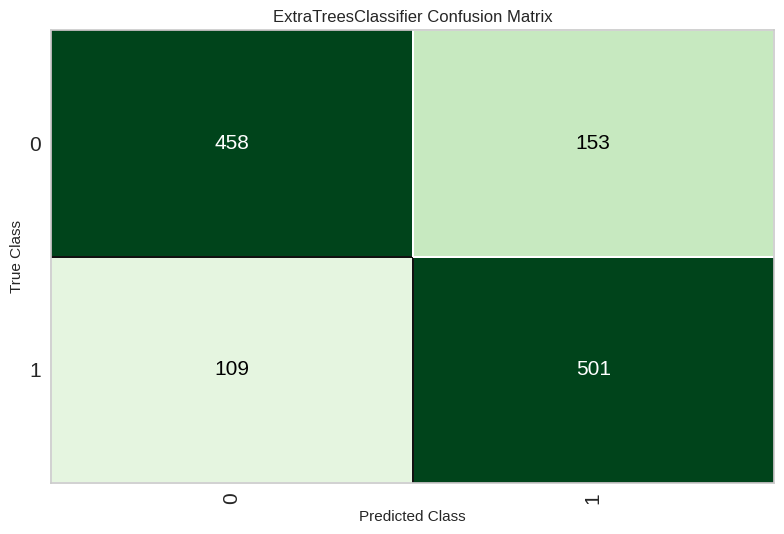

In [ ]:
plot_model(et1, plot='confusion_matrix')

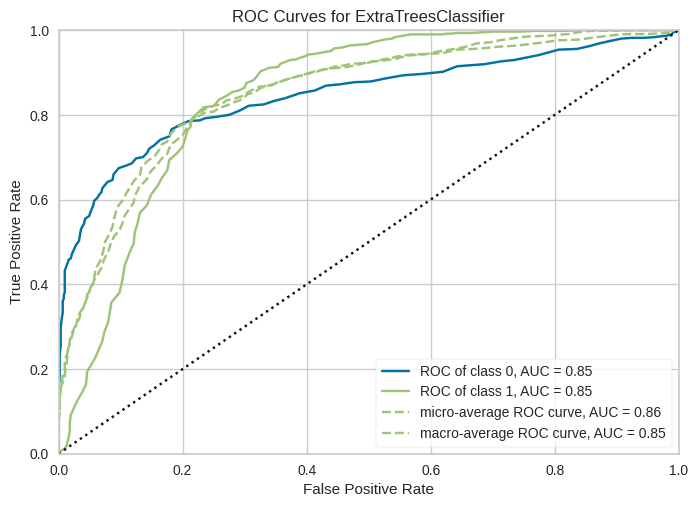

In [ ]:
plot_model(et1, plot = 'auc')

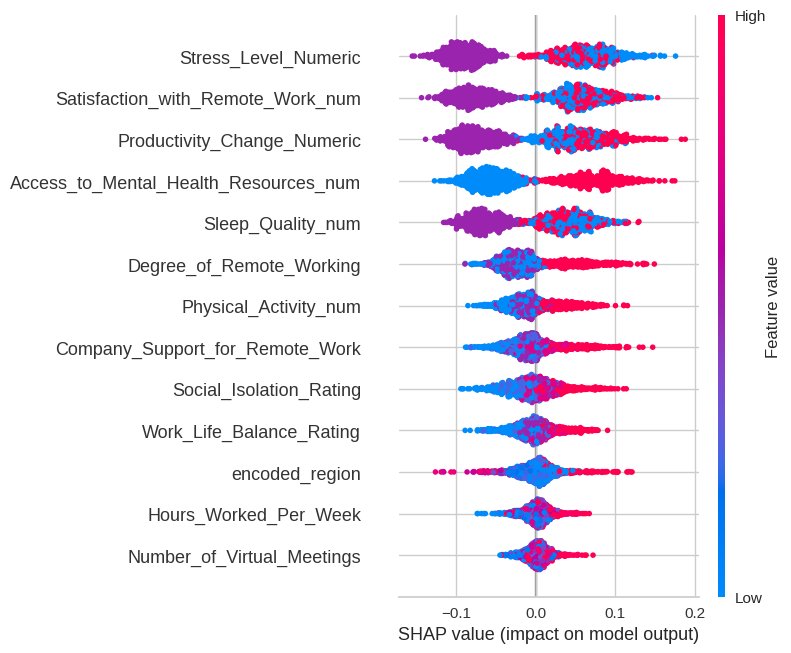

In [ ]:
interpret_model(et1)

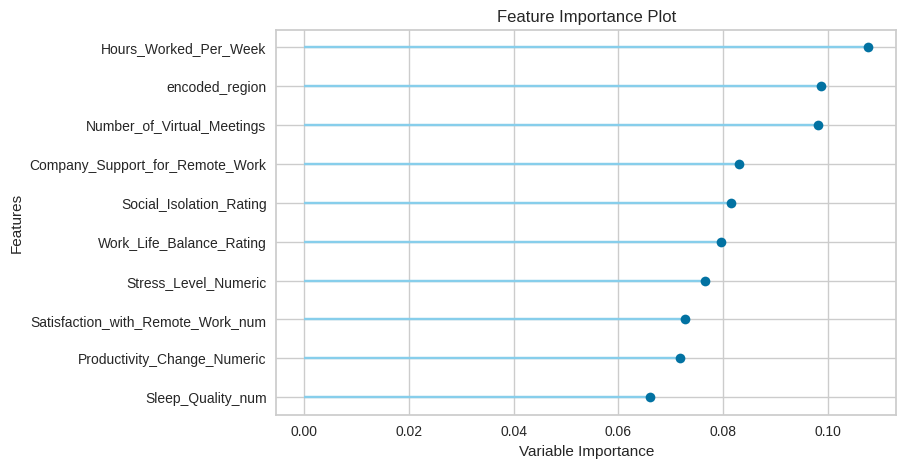

In [ ]:
plot_model(et1, plot='feature')

# 四、觀察與結論

#### 觀察與結論

🐨 CatBoostClassifier (CBC)

* 發現：
1. AUC of class 0 和 AUC of class 1 的值都是 0.86，表明模型對兩個類別均有穩定的區分能力。
2. Micro-average ROC AUC 為 0.89，顯示模型在整體數據上的分類性能非常強。
3. Macro-average ROC AUC 也為 0.86，說明模型在各類別的平均區分能力表現一致。
* 小結： CatBoostClassifier 是一個穩健的模型，能夠均衡地處理各類別數據，並在整體上表現優秀，特別適合類別平衡或類別間區分困難的任務。


🐨 LGBMClassifier (LGBM)

* 發現：
1. AUC of class 0 和 AUC of class 1 同樣為 0.86，顯示其對兩個類別有很好的區分能力。
2. Micro-average ROC AUC 值為 0.89，與 CatBoostClassifier 表現接近，證明其整體分類性能強勁。
3. Macro-average ROC AUC 也是 0.86，表明對所有類別的平均性能穩定。
* 小結： LGBMClassifier 與 CatBoostClassifier 的性能幾乎相當。LGBMClassifier 的訓練效率可能更快一些，適合處理大規模數據集。

🐨 GradientBoostingClassifier (GBC)
* 發現：
1. AUC of class 0 和 AUC of class 1 為 0.84，顯示其對類別的區分能力略低於 CatBoost 和 LGBM。
2. Micro-average ROC AUC 為 0.87，說明整體分類性能仍然不錯。
3. Macro-average ROC AUC 也為 0.84，表明其在各類別上的表現較為均衡，但不如前兩個模型穩定。
* 小結： GBC 表現雖然稍差於 CatBoost 和 LGBM，但仍是一個不錯的選擇，特別是在需要模型解釋性更高的情況下。

🐨 XGBClassifier (XGB)
* 發現：
1. AUC of class 0 和 AUC of class 1 為 0.85，區分能力介於 GBC 和 CatBoost/LGBM 之間。
2. Micro-average ROC AUC 為 0.88，表現接近 CatBoost 和 LGBM。
3. Macro-average ROC AUC 為 0.86，顯示其對各類別的區分能力穩定。
* 小結： XGBClassifier 是性能穩定的模型，在區分能力和整體分類能力方面與 CatBoost 和 LGBM 接近，但計算資源的需求可能略高。

🐨 RandomForestClassifier (RF)
* 發現：
1. AUC of class 0 和 AUC of class 1 為 0.86，表明其對類別的區分能力穩定。
2. Micro-average ROC AUC 值為 0.87，略低於 CatBoost 和 LGBM。
3. Macro-average ROC AUC 值為 0.86，說明對所有類別的平均性能良好。
* 小結： RF 在處理類別平衡數據時表現良好，但在處理大量特徵或更複雜數據時，可能不如 Boosting 模型準確？

🐨 ExtraTreesClassifier (ETC)

* 發現：
1. AUC of class 0 和 AUC of class 1 為 0.85，顯示其區分能力稍低於 RF 和 Boosting 模型。
2. Micro-average ROC AUC 值為 0.86，顯示整體分類性能略低於其他模型。
3. Macro-average ROC AUC 值為 0.85，表明其在各類別上的表現不錯，但稍微不穩定。
* 小結： ETC 是 RF 的快速版本，在訓練速度上較快，但分類性能稍差於 RF 和 Boosting 模型。

下面是我覺得可以做的結論（更新><！）

* 最佳選擇： CatBoostClassifier 和 LGBMClassifier 表現出色，適合對分類性能要求高的情境。
* 次佳選擇： XGBClassifier 和 RandomForestClassifier，在性能和穩定性上也有不錯的表現。
* 其他： GradientBoostingClassifier 和 ExtraTreesClassifier 適用於需要快速實現或者對解釋性有一定要求的時候。

## SHAP

### 根據上面SHAP圖做出的總結（小結在上面）
* 核心特徵： Stress_Level_Numeric 和 Satisfaction_with_Remote_Work_num 是所有圖中反復出現的最重要特徵，對預測結果的影響顯著。
* 次要特徵： Productivity_Change_Numeric 和 Access_to_Mental_Health_Resources_num 在不同模型中的影響穩定且重要。
* 個別特徵： Hours_Worked_Per_Week 和 Number_of_Virtual_Meetings 的影響在某些模型中突出，顯示這些特徵可能對特定預測場景更為重要。

## 特徵重要性圖（Feature Importance）

### 共同點

1. 高影響特徵：
大多數圖中，encoded_region 或 Hours_Worked_Per_Week 都是最重要的特徵，顯示地區和工作時長對模型影響最大。
Stress_Level_Numeric 在多數圖中位列前幾名，表明壓力水平是模型預測的重要因素。
2. 中等影響特徵：
Number_of_Virtual_Meetings 和 Social_Isolation_Rating 在多數情況下被認為是中等重要的特徵，說明會議次數和社交孤立對結果有穩定影響。
Productivity_Change_Numeric 和 Satisfaction_with_Remote_Work_num 在多數模型中具有一定的影響力。
3. 低影響特徵：
Sleep_Quality_num 和 Physical_Activity_num 通常出現在特徵列表的底部，表明它們的影響力有限。


### 不同點

* 特徵重要性排序：
部分圖中，encoded_region 的重要性遠超其他特徵，而在其他圖中，Hours_Worked_Per_Week 更具影響力。
不同模型對 Stress_Level_Numeric 和 Number_of_Virtual_Meetings 的依賴程度有所不同。
* 特徵影響範圍：
有些模型展示的特徵影響範圍較窄，僅限於幾個主要特徵，而另一些模型對多個特徵的影響力分佈更為均勻。


### 結論
1. 穩定的高影響特徵：encoded_region、Hours_Worked_Per_Week 和 Stress_Level_Numeric 是所有模型中最穩定的重要特徵。
2. 次要特徵的變化：Social_Isolation_Rating 和 Company_Support_for_Remote_Work 的排名在不同模型中有所波動。
3. 低影響特徵：Sleep_Quality_num 和 Physical_Activity_num 一致被認為是影響最小的特徵。